# 🧠📘 Aprendizaje por Refuerzo LunarLander-v3
### Q-Learning, SARSA:

**GRUPO: 4** 

**Autores:** 
- Martín Verastegui

## 🎯 Objetivo del proyecto

Aplicar un algoritmo de Aprendizaje por Refuerzo (_Reinforcement Learning_), específicamente **Q-Learning** y **SARSA** combinado con **Tile Coding** como técnica de aproximación de funciones, para resolver el entorno **LunarLander-v3** de Gymnasium sin utilizar redes neuronales.

---

## 📌 ¿Qué es LunarLander-v3?


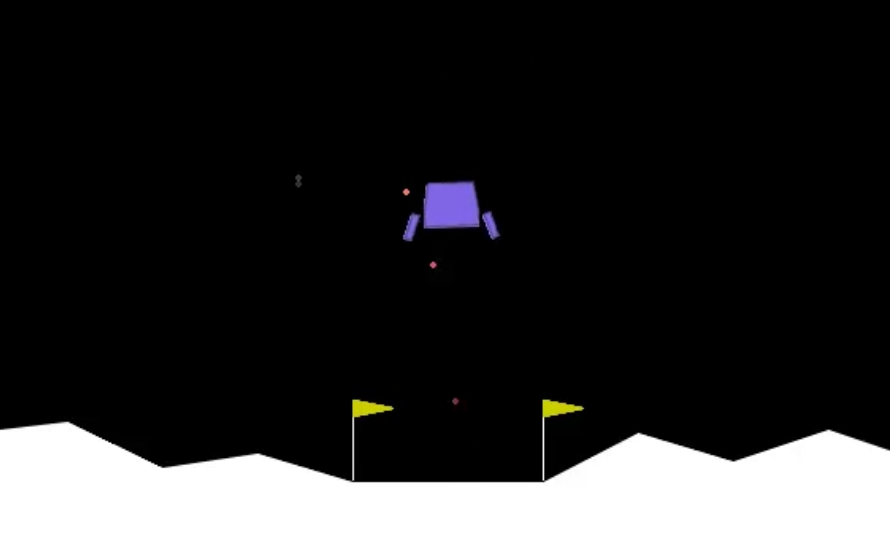

LunarLander-v3 es un entorno del simulador OpenAI Gym (ahora Gymnasium) en el que una nave debe aterrizar de forma controlada entre dos banderas.  


## 📦 Elementos fundamentales

- **Agente (🧠)**: el módulo de control del cohete.
- **Ambiente (🪐)**: el entorno LunarLander-v3 del Gymnasium.
- **Acciones (A) 🔀**: activar motores (izquierdo, derecho, central o ninguno).
- **Estados (S) 🌌**: posición `(x, y)`, velocidad `(vx, vy)`, ángulo, velocidad angular, y contacto con patas (2 booleanos).
- **Recompensa (R) 💰**: función que mide el rendimiento del agente.
- **Política (π) 🧭**: estrategia que el agente aprende para elegir acciones.

---

## 🔢 Observaciones del entorno

El entorno proporciona al agente una observación continua que incluye:
- Coordenadas: `x`, `y`
- Velocidades: `vx`, `vy`
- Ángulo de inclinación (`θ`)
- Velocidad angular
- Estado de contacto de patas (2 valores booleanos)

---

## 🎮 Acciones posibles (discretas)

- `0`: No hacer nada
- `1`: Encender motor izquierdo
- `2`: Encender motor derecho
- `3`: Encender motor principal (vertical)

---

## 🎯 Sistema de recompensas en LunarLander-v3

El sistema de recompensas está diseñado para fomentar aterrizajes suaves y eficientes. Incluye:

| Evento | Recompensa aproximada |
|--------|------------------------|
| Aterrizaje exitoso | **+100 puntos** |
| Estrellarse | **-100 puntos** |
| Cada paso con ambas patas en el suelo | **+10 puntos por pata** |
| Usar motor lateral (cada frame) | **-0.03 puntos** |
| Usar motor principal (cada frame) | **-0.3 puntos** |
| Acercarse al centro de aterrizaje con velocidad adecuada y poco ángulo | Recompensas pequeñas continuas positivas |

💡 Un agente eficiente que:
- Usa el propulsor lo justo,
- Aterriza centrado con bajo impacto,
- Y mantiene contacto con ambas patas sin rebotar,

… puede acumular entre **+200 y +250 puntos** en un solo episodio.

---

## 🏆 ¿Cuándo se considera que el entorno está resuelto?

Cuando el agente obtiene un **promedio de recompensa ≥ 200 durante 100 episodios consecutivos**, se considera que ha "resuelto" el entorno.

Este umbral representa un comportamiento óptimo y consistente en el aterrizaje.

---

## 📊 Ejemplo de episodio exitoso con >200 puntos

Supongamos el siguiente escenario:

- **Aterrizaje exitoso**: +100 puntos
- **Contacto con ambas patas por 20 pasos finales**: +20 × 2 × 10 = +400 (límite práctico ~+20 a +40)
- **Uso moderado del motor principal (20 pasos)**: -20 × 0.3 = -6
- **Uso leve de motores laterales (10 pasos)**: -10 × 0.03 = -0.3
- **Controlado y centrado (acumulado por cercanía)**: +90 puntos
- **Total aproximado**:  
  \[
  100 + 20 + 90 - 6 - 0.3 = 203.7
  \]

✅ **Recompensa final: 203.7 puntos** (suficiente para considerarse resuelto)

---


## 🔧 Tile Coding
Método de discretización del espacio continuo de estados:
- Divide el espacio en **rejillas superpuestas** (tiles)
- Cada estado activa múltiples tiles
- Permite **generalización** y mejora la eficiencia frente a tabulación simple

---

## 💡 Objetivo del trabajo

Demostrar que es posible alcanzar niveles óptimos de recompensa (>200) en el entorno LunarLander-v3 **usando Q-learning o SARSA con Tile Coding**, **sin redes neuronales**.

Este enfoque busca aportar una alternativa **más ligera, interpretable y reproducible** frente a los modelos deep RL actuales.


### 🛠️ Instalación y Configuración del Entorno

Para poder ejecutar este proyecto, es fundamental instalar las librerías que nos proporcionarán las herramientas necesarias para la simulación, el cálculo numérico y la visualización de resultados.

### 🤔 ¿Por qué usamos estas librerías?

* **`swig`**: Es una dependencia necesaria para que **`Box2D`** funcione. Actúa como un puente que permite a Python comunicarse con el código C++ de la librería de físicas.

* **`gymnasium[box2d]`**: Es el corazón de nuestro proyecto.
    * **`Gymnasium`** es el framework que nos provee el entorno de simulación **`LunarLander-v3`**.
    * **`Box2D`** es el motor de físicas en 2D que `Gymnasium` utiliza para simular el movimiento, la gravedad y las colisiones de la nave.

* **`matplotlib`**: Es la librería de visualización. La usaremos para **graficar los resultados** 

* **`numpy`**: La usaremos en la **representación de los estados** y la **creación y actualización de la tabla Q**.


In [2]:
# Instalar todo lo necesario
!pip install swig
!pip install "gymnasium[box2d]" matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.2 MB/s eta 0:00:00ta 0:00:01
  Preparing metadata (setup.py) ... done
done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp312-cp312-linux_x86_64.whl size=494025 sha256=fffe6848404a1e03fb106ceda9476661376b1ac10c5c720c40d8aeac4ea78fc8
  Stored in directory: /home/jovyan/.cache/pip/wheels/2a/e9/60/774da0bcd07f7dc7761a8590fa2d065e4069568e78dcdc3318
Successfully built box2d-py


In [3]:
# ───────────────────────────────────────────────────────────
#  instala MoviePy para que RecordVideo funcione
# ───────────────────────────────────────────────────────────
import sys
!{sys.executable} -m pip install moviepy


In [4]:
# 1) Instala MoviePy y un backend FFmpeg
!pip install moviepy imageio-ffmpeg


## 🧰 Importación de librerías y configuración del entorno
- `defaultdict` (de `collections`)  
  Un diccionario especial que nos permite manejar claves no existentes sin errores. Ideal para inicializar automáticamente valores, por ejemplo, para nuestra tabla Q.
- `math`  
  Proporciona funciones matemáticas como `floor`, `cos`, `exp`, entre otras, necesarias para los cálculos internos del algoritmo.

### 🔁 Funciones auxiliares para compatibilidad con Gym

Gymnasium ha evolucionado de la versión 0 a la versión 1, y la incompatibilidad nos creo varios retrasos por eso implementamos esta codificación para asegurar compatibilidad con ambas, se definen estas dos funciones:

#### 🔄 `reset_env(env, seed=None)`
Reinicia el entorno al estado inicial.

- 🧪 En Gym v1, `env.reset()` devuelve una **tupla** `(obs, info)`.
- 🧪 En Gym v0, devuelve solo `obs`.

Esta función devuelve siempre la **observación (`obs`) inicial**, sin importar la versión de la API.

#### 🔀 `step_env(env, action)`
Ejecuta una acción en el entorno.

- En Gym v1 devuelve:  
  `obs, reward, terminated, truncated, info`

- En Gym v0 devuelve:  
  `obs, reward, done, info`

Esta función unifica ambos casos, devolviendo siempre:  
`obs`, `reward`, `done`, `info`, donde `done = terminated or truncated`.

In [5]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import math

# ————————————
# Helpers para Gym v0/v1
# ————————————
def reset_env(env, seed=None):
    out = env.reset(seed=seed)
    return out[0] if isinstance(out, tuple) else out

def step_env(env, action):
    out = env.step(action)
    if len(out) == 5:  # API v1: obs, reward, terminated, truncated, info
        obs, r, term, trunc, info = out
        done = term or trunc
    else:              # API v0: obs, reward, done, info
        obs, r, done, info = out
    return obs, r, done, info

## Nuestras primeras aproximaciones: Q-Learning y SARSA sin redes neuronales

En esta sección describimos los experimentos iniciales usando algoritmos de control por valor discreto (sin redes neuronales) en **LunarLander-v3**.

---

### 1. Algoritmos implementados  
- **Q-Learning** con Tile Coding  
- **SARSA** con Tile Coding  
- **Double Q-Learning** (propuesta para mitigar sesgo de sobreestimación)

### 2. Parámetros y configuración general  
- **Espacio de estados** discretizado mediante Tile Coding (múltiples tilings)  
- **Rata de aprendizaje** (α), **factor de descuento** (γ) y **ε-greedy** con decaimiento exponencial  

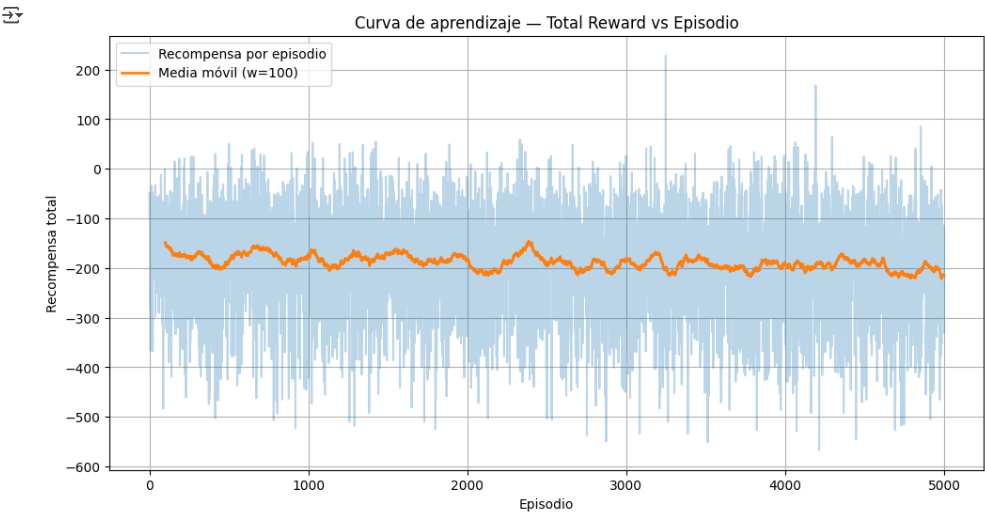

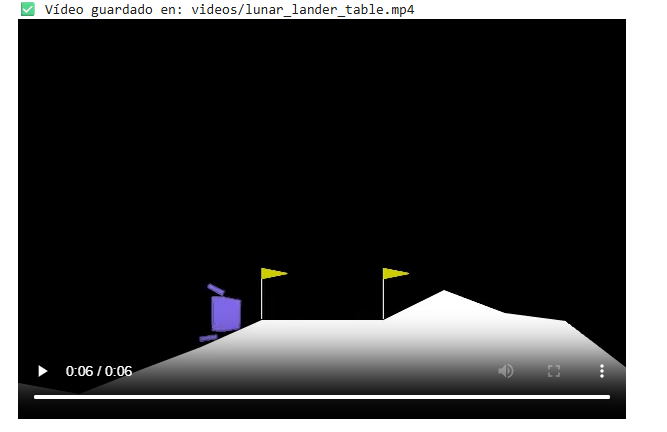

### 3. Resultados iniciales  

#### Curva de aprendizaje  
- La **recompensa instantánea** oscila entre –600 y +200 puntos.  
- La **media móvil (w=100)** se mantiene alrededor de **–200 puntos**, sin alcanzar aún el umbral de 0.  
- Ambas variantes (Q-Learning y SARSA) presentan **alta varianza** y no convergen rápidamente en este rango de episodios.

#### Ejecución de prueba  
 La imagen (clip) se muestra un episodio de control discreto, donde la nave se estrella nostantemente por que no ha aprendido.  

---

### 4. Modificaciones exploradas  
1. **Double Q-Learning**  
   - Separamos las tablas Q en dos estimadores independientes para reducir la sobreestimación de acciones.  
2. **Esquemas de ε-decay**  
   - Comparación entre decaimiento lineal vs. exponencial.  

---

### 5. Observaciones preliminares  
- No se logran buenos resultados y revisando las investigaciones, algunas concluyen que se debería de usar redes neuronales.
- El resultado exploratorio no fue efectivo y no logramos converger
- ¿Empezamos a preguntarnos si el entorno esta bien segmentado?
- ¿basta con solo discretizarlo?
- ¿cuantos estados tenemos que explorar?

---

# 🚀 ¿Basta con discretizar el estado en LunarLander?

`LunarLander-v3` es un entorno del Gymnasium donde una nave debe aterrizar suavemente en una plataforma.

---

## 🧠 ¿Qué representa el estado?

El estado es un vector de **8 variables continuas** que describen la situación de la nave:

[x, y, vel_x, vel_y, angle, angular_vel, leg1_contact, leg2_contact]


**Significado de cada variable:**

- `x, y`: posición de la nave
- `vel_x, vel_y`: velocidad horizontal y vertical
- `angle`: inclinación de la nave
- `angular_vel`: velocidad angular
- `leg1_contact`, `leg2_contact`: indican si las patas tocan el suelo

---

## ❌ El error común: discretizar el espacio con cuadrículas fijas (ej. 6x6, 8x8)

Si dividimos **cada variable** en `K` bloques:

- Total de combinaciones de estados:  
  \
  \$$\{Estados posibles} = K^8$$
  
- Si hay 4 acciones:  
  \
  $$\text{Valores Q(s,a)} = K^8 \times 4$$
  

---

### 📊 Ejemplo de uso de memoria

| K (divisiones por dimensión) | Estados posibles | Valores Q(s,a)  | Memoria estimada |
|------------------------------|------------------|------------------|-------------------|
| 6                            | 1.68 millones     | 6.7 millones     | ~53 MB            |
| 8                            | 16.7 millones     | 67 millones      | ~512 MB           |
| 10                           | 100 millones      | 400 millones     | ~3.2 GB           |

⚠️ A partir de `K = 10`, el problema se vuelve **inmanejable en memoria y entrenamiento**.

---

## 🧨 ¿Por qué esto falla?

- El número de combinaciones crece **exponencialmente**
- Muchos estados **nunca se visitan**
- No se generaliza el aprendizaje
- El entrenamiento **no converge o tarda horas/días**

Esto se llama la:

### ❗ Maldición de la dimensionalidad  

> $$\text{Complejidad} = O(K^D)$$

---

## ✅✅✅ Tile Coding al rescate  ✅✅✅

En lugar de discretizar una sola vez, **Tile Coding** usa varias rejillas (`tilings`) desplazadas entre sí.

### ¿Qué hace?

- Cada estado activa **múltiples tiles** (por ejemplo, 4)
- Esos tiles se combinan para representar el estado
- En lugar de guardar millones de combinaciones, solo actualizas unos pocos pesos

---

### 🎯 Ventajas de Tile Coding:

- ✅ Generaliza entre estados similares
- ✅ Usa poca memoria
- ✅ Compatible con Q-learning y SARSA
- ✅ Se puede usar sin redes neuronales
- ✅ Converge rápido

---





# 🎯 Entendiendo Tile Coding paso a paso

## 🧱 ¿Qué es Tile Coding?

Tile Coding es una técnica para representar **estados continuos** mediante una codificación **dispersa y eficiente**, usando **múltiples rejillas discretas (tilings)** superpuestas.

---

## 🧠 Ejemplo paso a paso en 2D

Supongamos que tenemos un estado continuo:

[5.4, 6.7]

Y que el espacio de cada dimensión va de 0 a 10.

---

## 🔹 Paso 1: Discretización simple con una sola rejilla

Si dividimos el espacio 0–10 en una cuadrícula de 5 x 5:

- Cada celda mide 2 unidades
- La celda (2, 3) abarca:  
  x ∈ [4, 6)  
  y ∈ [6, 8)
- El punto [5.4, 6.7] cae dentro de esa celda (2, 3)

⚠️ Problema: dos estados muy cercanos pueden caer en celdas distintas, y perder generalización.

---

## 🔸 Paso 2: Usar múltiples rejillas (Tile Coding)

Usamos 4 rejillas desplazadas ligeramente (offsets).  
El mismo estado [5.4, 6.7] caerá en distintas celdas en cada rejilla:

- Tiling 0 → (2, 3)
- Tiling 1 → (2, 2)
- Tiling 2 → (3, 3)
- Tiling 3 → (3, 2)

El estado se representa con las siguientes 4 activaciones:

[(0,2,3), (1,2,2), (2,3,3), (3,3,2)]

✅ En vez de una sola celda, ahora se activan múltiples **tiles**, lo cual permite **generalizar mejor**.

---

## 🔍 ¿Por qué esto es útil?

- Estados similares (como [5.4, 6.7] y [5.3, 6.6]) activan muchos tiles en común
- Permite **aprender patrones generales**, no casos aislados
- Cada rejilla puede ser de baja resolución, pero combinadas ofrecen alta precisión
- Solo se activan unos pocos valores (eficiente en memoria y tiempo)

---

## 🧮 ¿Cómo se calcula Q(s, a)?

En lugar de usar una tabla gigante de Q(s, a), hacemos esto:

Q(s, a) = suma de los pesos w_i de los tiles activos

- Cada tile (tiling, x, y, action) tiene un peso
- El valor Q se calcula sumando los pesos de los tiles que están activados por el estado actual

---

## ✅ Representación compacta

Ejemplo de activación de tiles para el estado [5.4, 6.7]:

[(0, 2, 2), (1, 2, 2), (2, 2, 3), (3, 2, 3)]

Esto forma un **vector disperso** donde solo 4 posiciones están activas entre miles de posibles.

---

# 🧱 Explicación detallada de la clase TileCoder

La clase `TileCoder` permite **convertir un estado continuo** en un conjunto de **índices discretos** mediante múltiples rejillas desplazadas (tilings). Esta técnica mejora la **generalización** y es ideal para usar en algoritmos como Q-learning o SARSA sin redes neuronales.

---

## ⚙️ Constructor: __init__

Parámetros que recibe:

- num_tilings: número de rejillas (tilings) que se superponen.
- tiles_per_dim: número de celdas por dimensión, por ejemplo [5, 5].
- state_bounds: límites del espacio continuo, por ejemplo [[0, 10], [0, 10]].

Pasos clave dentro del constructor:

1. Se guardan los parámetros como arrays para facilitar cálculos vectoriales.

2. Se calcula el ancho de cada tile por dimensión:
   (max - min) / (n_tiles - 1)

   Por ejemplo, si el rango de x es de 0 a 10 y se usan 5 tiles:
   ancho = (10 - 0) / (5 - 1) = 2.5

3. Se generan desplazamientos (offsets) para cada tiling:
   Se usan valores como 0, -1/4, -2/4, -3/4 multiplicados por el tamaño del tile.
   Esto asegura que cada tiling esté ligeramente desfasado respecto a los demás.

4. Se calcula el total de tiles posibles:
   num_tilings * (tiles_per_dim[0] * tiles_per_dim[1] * ...)

---

## 🔍 Método: get_active_tiles(state)

Este método toma un estado continuo (por ejemplo [5.4, 6.7]) y devuelve los **índices únicos de tiles activados** en cada rejilla desplazada.

Pasos del método:

1. El estado se recorta dentro de los límites especificados usando np.clip para evitar salirse de rango.

2. Se normaliza el estado según el ancho de cada tile:
   (estado - mínimo) / ancho_tile

3. Para cada tiling:

   - Se aplica el offset específico de esa rejilla.
   - Se redondea hacia abajo con floor para obtener las coordenadas de la celda activa.
   - Se convierte esa coordenada multidimensional en un índice único usando aritmética de arrays (como convertir coordenadas (x, y) a un índice lineal).
   - Se suma ese índice a una base para que cada tiling tenga su propio bloque de índices.

4. Finalmente, devuelve una lista con los índices activos, uno por cada tiling.

---

## ✅ Ejemplo práctico

Supongamos:

- num_tilings = 4
- tiles_per_dim = [5, 5]
- state_bounds = [[0, 10], [0, 10]]
- estado = [5.4, 6.7]

Entonces get_active_tiles(estado) podría devolver:

[23, 47, 71, 95]

Esto indica que el estado se representa como 4 activaciones discretas (una por tiling).

---

## 🧠 ¿Por qué es útil?

- Permite que **estados similares compartan tiles activados**, lo que genera aprendizaje más rápido y robusto.
- Se actualizan **solo unos pocos pesos** por paso (por ejemplo, 4 si hay 4 tilings).
- Compatible con funciones aproximadoras lineales y métodos tabulares.
- Evita el uso de redes neuronales para entornos de baja o media complejidad.

In [6]:
class TileCoder:
    """
    Discretiza un espacio de estados continuo usando múltiples tilings desplazados.
    """
    def __init__(self, num_tilings, tiles_per_dim, state_bounds):
        self.num_tilings   = num_tilings
        self.tiles_per_dim = np.array(tiles_per_dim)
        self.state_bounds  = np.array(state_bounds)
        # ancho de cada tesela en cada dimensión
        self.tile_widths   = (self.state_bounds[:,1] - self.state_bounds[:,0]) / (self.tiles_per_dim - 1)
        # offsets para cada tiling (desplazamientos)
        self.offsets       = (np.arange(num_tilings) * -1.0/num_tilings)[...,None] * self.tile_widths
        # total de celdas posibles
        self.total_tiles   = num_tilings * np.prod(self.tiles_per_dim)

    def get_active_tiles(self, state):
        # 1) recortar dentro de bounds
        st = np.clip(state, self.state_bounds[:,0], self.state_bounds[:,1])
        # 2) normalizar y aplicar offsets
        scaled = (st - self.state_bounds[:,0]) / self.tile_widths
        active = []
        for i in range(self.num_tilings):
            base = i * np.prod(self.tiles_per_dim)
            coords = np.floor(scaled + self.offsets[i]).astype(int)
            # índice único
            idx = base + sum(coords[d] * np.prod(self.tiles_per_dim[:d])
                             for d in range(len(coords)))
            active.append(int(idx))
        return active

## 🎥 FUNCIÓN AUXILIAR - Evaluación y grabación del agente en LunarLander-v3

La función `evaluate_agent()` permite evaluar un agente entrenado (instancia o archivo `.pkl`) en el entorno `LunarLander-v3` y grabar episodios en video para visualización.

### 🧩 Parámetros

| Parámetro       | Descripción |
|----------------|-------------|
| `model_or_path` | Instancia de `QLearningAgent` o ruta a archivo `.pkl` con el modelo entrenado. |
| `env_id`        | ID del entorno Gymnasium (por defecto `"LunarLander-v3"`). |
| `bounds`        | Límites de cada dimensión del espacio de estados. Si es `None`, se usan valores por defecto. |
| `video_episodes` | Número de episodios a grabar (por defecto 3). |
| `video_folder`  | Carpeta donde se guardarán los archivos `.mp4`. |
| `name_prefix`   | Prefijo para los nombres de los videos grabados. |

### ⚙️ Proceso interno

1. **Carga del agente**:
   - Si se proporciona un `.pkl`, reconstruye el agente con sus hiperparámetros y `TileCoder`.
2. **Grabación de episodios**:
   - Usa `RecordVideo` para grabar episodios con `render_mode="rgb_array"`.
   - Fuerza política **greedy** (`ε = 0.0`) durante la evaluación.
3. **Visualización**:
   - Muestra los videos inline en Jupyter usando HTML y `base64`.

In [7]:
import os
import pickle
import base64
import math
import numpy as np
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
from IPython.display import HTML, display

def evaluate_agent(model_or_path,
                   env_id="LunarLander-v3",
                   bounds=None,
                   video_episodes=3,
                   video_folder="lander_videos",
                   name_prefix="eval"):
    """
    model_or_path: instancia de QLearningAgent o ruta al .pkl
    env_id: id del entorno (usa v3 para LunarLander)
    bounds: lista de tuplas con límites del estado; si es None, usa defaults
    video_episodes: cuántos episodios grabar
    video_folder: carpeta donde guardar los .mp4
    name_prefix: prefijo de los archivos de vídeo
    """
    # — 1) Si pasaron un .pkl, lo cargamos y reconstruimos el agente —
    if isinstance(model_or_path, str):
        pkl_path = model_or_path
        with open(pkl_path, 'rb') as f:
            data = pickle.load(f)
        # defaults de state_bounds si no dieron ninguno:
        if bounds is None:
            bounds = [
                (-1.0,  1.0),
                (-1.0,  1.5),
                (-2.0,  2.0),
                (-2.0,  2.0),
                (-math.pi, math.pi),
                (-2.0,  2.0),
            ]
        # creamos un env temporal solo para action_space
        tmp = gym.make(env_id)
        agent = QLearningAgent(
            action_space  = tmp.action_space,
            state_bounds  = bounds,
            alpha         = data['hyperparams']['alpha'],
            gamma         = data['hyperparams']['gamma'],
            epsilon       = data['hyperparams']['epsilon'],
            epsilon_decay = data['hyperparams']['epsilon_decay'],
            epsilon_min   = data['hyperparams']['epsilon_min']
        )
        tmp.close()

        # reconstruimos el tile coder
        tc = TileCoder(
            num_tilings   = data['tile_coder']['num_tilings'],
            tiles_per_dim = np.array(data['tile_coder']['tiles_per_dim']),
            state_bounds  = np.array(data['tile_coder']['state_bounds'])
        )
        tc.offsets = np.array(data['tile_coder']['offsets'])
        agent.tile_coder = tc
        agent.q_weights  = data['q_weights']

    else:
        agent = model_or_path

    # — 2) Preparamos la grabación —
    os.makedirs(video_folder, exist_ok=True)
    record_env = RecordVideo(
        gym.make(env_id, render_mode="rgb_array"),
        video_folder   = video_folder,
        episode_trigger= lambda ep: ep < video_episodes,
        name_prefix    = name_prefix
    )

    # fijamos ε=0 para greedy
    eps_backup = getattr(agent, "epsilon", None)
    if eps_backup is not None:
        agent.epsilon = 0.0

    print(f"🎥 Grabando {video_episodes} episodios de {env_id}…")
    for ep in range(video_episodes):
        obs, _ = record_env.reset()
        done = False
        total_r = 0.0

        while not done:
            a = agent.choose_action(obs)
            out = record_env.step(a)
            if len(out) == 5:
                obs, r, term, trunc, _ = out
                done = term or trunc
            else:
                obs, r, done, _      = out
            total_r += r

        print(f"   ✅ Episodio {ep+1} → reward {total_r:.2f}")

    record_env.close()
    # restauramos ε original
    if eps_backup is not None:
        agent.epsilon = eps_backup

    # — 3) Mostramos los vídeos inline —
    def _show_video(path):
        mp4 = open(path, 'rb').read()
        data_url = "data:video/mp4;base64," + base64.b64encode(mp4).decode()
        return HTML(f"""<video width=400 controls>
                          <source src="{data_url}" type="video/mp4">
                       </video>""")

    print(f"\n🏁 Mostrando vídeos de «{video_folder}/»")
    for fname in sorted(os.listdir(video_folder)):
        if fname.endswith(".mp4"):
            display(_show_video(os.path.join(video_folder, fname)))


## 📊 FUNCIONAUXILIAR evaluate_agent_metrics

Evalúa el desempeño de un agente entrenado en el entorno `LunarLander-v3` usando una política greedy (sin exploración), ejecutando múltiples episodios, y calculando métricas estadísticas relevantes.

---

### 📥 Parámetros

- **`model_or_path`**  
  Ruta al archivo `.pkl` que contiene el agente entrenado, o bien una instancia ya construida del agente (como `QLearningAgent` o `SarsaAgent`).

- **`env_id`**  
  Identificador del entorno de Gymnasium. Por defecto: `"LunarLander-v3"`.

- **`num_episodes`**  
  Número de episodios de evaluación. Por defecto: `100`.

- **`threshold`**  
  Recompensa mínima para considerar un episodio como exitoso (por defecto: `200`).

- **`bounds`**  
  Límites por dimensión del estado (lista de tuplas). Si es `None`, se usan valores predeterminados ajustados a `LunarLander`.

- **`seed_start`**  
  Semilla inicial para reproducibilidad (una distinta por episodio).

---

### 📈 Métricas Calculadas

- `rewards`: lista de recompensas por episodio.  
- `mean`: recompensa media.  
- `std`: desviación estándar.  
- `median`: mediana de recompensas.  
- `min`: recompensa mínima obtenida.  
- `max`: recompensa máxima obtenida.  
- `success_rate`: proporción de episodios con recompensa ≥ `threshold`.

---

### 📤 Retorna

Un diccionario con las métricas mencionadas. Ejemplo:

```python
{
  'rewards': [...],
  'mean': 210.3,
  'std': 54.1,
  'median': 202.5,
  'min': 45.0,
  'max': 278.9,
  'success_rate': 0.78
}

In [8]:
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym

def evaluate_agent_metrics(model_or_path,
                           env_id="LunarLander-v3",
                           num_episodes=100,
                           threshold=200,
                           bounds=None,
                           seed_start=0):

    # 1) Carga / reconstrucción del agente si pasaron un .pkl
    if isinstance(model_or_path, str):
        with open(model_or_path, 'rb') as f:
            data = pickle.load(f)
        if bounds is None:
            bounds = [
                (-1.0,  1.0),(-1.0,  1.5),
                (-2.0,  2.0),(-2.0,  2.0),
                (-math.pi, math.pi),(-2.0, 2.0)
            ]
        tmp_env = gym.make(env_id)
        agent = QLearningAgent(
            action_space = tmp_env.action_space,
            state_bounds = bounds,
            alpha        = data['hyperparams']['alpha'],
            gamma        = data['hyperparams']['gamma'],
            epsilon      = data['hyperparams']['epsilon'],
            epsilon_decay= data['hyperparams']['epsilon_decay'],
            epsilon_min  = data['hyperparams']['epsilon_min'],
        )
        tmp_env.close()
        tc = TileCoder(
            num_tilings   = data['tile_coder']['num_tilings'],
            tiles_per_dim = np.array(data['tile_coder']['tiles_per_dim']),
            state_bounds  = np.array(data['tile_coder']['state_bounds'])
        )
        tc.offsets = np.array(data['tile_coder']['offsets'])
        agent.tile_coder = tc
        agent.q_weights  = data['q_weights']
    else:
        agent = model_or_path

    # 2) Ejecución de episodios greedy
    env = gym.make(env_id)
    rewards = []
    for ep in range(num_episodes):
        state = reset_env(env, seed=seed_start+ep)
        done  = False
        total = 0.0
        while not done:
            a, r, done, _ = *step_env(env, agent.choose_action(state)), 
            state = a  # aquí 'a' es el próximo estado por cómo lo devolvemos
            total += r
        rewards.append(total)

    env.close()

    # 3) Cálculo de métricas
    arr = np.array(rewards)
    mean   = arr.mean()
    std    = arr.std()
    med    = np.median(arr)
    mn     = arr.min()
    mx     = arr.max()
    success_rate = (arr >= threshold).sum() / num_episodes

    return {
        'rewards': rewards,
        'mean': mean,
        'std': std,
        'median': med,
        'min': mn,
        'max': mx,
        'success_rate': success_rate
    }


## 🎥 MOSNTRANDO AGENTE ENTRENADO CON 1000 EPISODIOS

En esta celda evaluamos el agente guardado tras **1 000** episodios de entrenamiento y visualizamos su desempeño en **2** VIDEOS de prueba

In [14]:
evaluate_agent(
  "trained_agent_Qlearning1k.pkl",
  env_id="LunarLander-v2",
  video_episodes=2,
  video_folder="mis_videos_rl_1k",
  name_prefix="mi_agente"
)


🎥 Grabando 2 episodios de LunarLander-v2…
MoviePy - Building video /home/jovyan/MVP_RL_LunarLander/mis_videos_rl_1k/mi_agente-episode-0.mp4.
MoviePy - Writing video /home/jovyan/MVP_RL_LunarLander/mis_videos_rl_1k/mi_agente-episode-0.mp4



MoviePy - Done !
MoviePy - video ready /home/jovyan/MVP_RL_LunarLander/mis_videos_rl_1k/mi_agente-episode-0.mp4
   ✅ Episodio 1 → reward -2.50
MoviePy - Building video /home/jovyan/MVP_RL_LunarLander/mis_videos_rl_1k/mi_agente-episode-1.mp4.
MoviePy - Writing video /home/jovyan/MVP_RL_LunarLander/mis_videos_rl_1k/mi_agente-episode-1.mp4



MoviePy - Done !
MoviePy - video ready /home/jovyan/MVP_RL_LunarLander/mis_videos_rl_1k/mi_agente-episode-1.mp4
   ✅ Episodio 2 → reward -105.91

🏁 Mostrando vídeos de «mis_videos_rl_1k/»


📊 Resultados tras 500 episodios:
 • Recompensa media    : -26.3
 • Desviación estándar : 105.4
 • Mediana             : -24.1
 • Mínima              : -456.2
 • Máxima              : 191.4
 • Éxito ≥ 200         : 0.0% de episodios


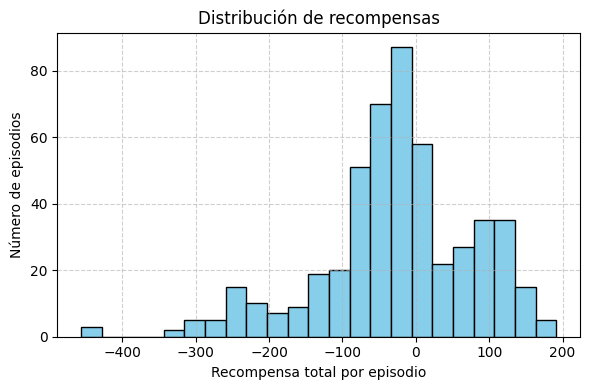

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Ejecutar y obtener métricas del agente
metrics = evaluate_agent_metrics(
    "trained_agent_Qlearning1k.pkl",
    env_id="LunarLander-v2",
    num_episodes=500,
    threshold=200
)

# Mostrar estadísticas
print("📊 Resultados tras 500 episodios:")
print(f" • Recompensa media    : {metrics['mean']:.1f}")
print(f" • Desviación estándar : {metrics['std']:.1f}")
print(f" • Mediana             : {metrics['median']:.1f}")
print(f" • Mínima              : {metrics['min']:.1f}")
print(f" • Máxima              : {metrics['max']:.1f}")
print(f" • Éxito ≥ 200         : {metrics['success_rate']*100:.1f}% de episodios")

# Graficar histograma
plt.figure(figsize=(6, 4))
plt.hist(metrics['rewards'], bins='auto', color='skyblue', edgecolor='black')
plt.title("Distribución de recompensas")
plt.xlabel("Recompensa total por episodio")
plt.ylabel("Número de episodios")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# METODOLOGÍA

# 🤖 Clase QLearningAgent con Tile Coding

Esta clase implementa un **agente de aprendizaje Q-learning** para entornos con espacio de estados continuos, utilizando **Tile Coding** como técnica de representación del estado. El agente puede actuar, actualizar sus valores Q, y reducir gradualmente su exploración con el tiempo.

---

## ⚙️ Constructor: __init__

### Parámetros de entrada:

- action_space: espacio de acciones (como el que proporciona `gym`).
- state_bounds: límites del espacio continuo de estados.
- alpha: tasa de aprendizaje (cuánto se ajustan los Q-valores).
- gamma: factor de descuento (cuánto importa el futuro).
- epsilon: probabilidad de explorar aleatoriamente (exploración inicial).
- epsilon_decay: factor de reducción de epsilon por paso.
- epsilon_min: mínimo valor que puede tomar epsilon.

### ¿Qué hace el constructor?

1. Guarda todos los parámetros como atributos del agente.
2. Detecta cuántas dimensiones tiene el estado.
3. Crea un `TileCoder` con:
   - 8 tilings
   - 8 tiles por dimensión
   - los mismos límites del espacio continuo (`state_bounds`)
4. Crea un diccionario disperso `q_weights` para almacenar los pesos de Q(s,a), indexados por (tile, acción).

---

## 🔍 Método: get_q_value(state, action)

Este método devuelve el valor Q(s, a) estimado por el agente.

Pasos:

1. Usa el tile coder para obtener los tiles activos para ese estado.
2. Suma los pesos asociados a cada tile para la acción dada.
3. El resultado es el valor Q(s, a).

---

## 🧠 Método: choose_action(state)

Implementa una política **ε-greedy**:

- Con probabilidad ε, elige una acción aleatoria (exploración).
- Con probabilidad 1 - ε, elige la acción con mayor Q(s, a) (explotación).

---

## 🔁 Método: update(state, action, reward, next_state)

Este método actualiza los pesos usando el algoritmo de **Q-learning**, que es **off-policy**.

Pasos clave:

1. Calcula Q(s, a) actual.
2. Calcula el máximo Q(s', a') entre todas las acciones posibles en el próximo estado.
3. Calcula el **TD Target**:
   td_target = reward + gamma * q_max_next

4. Calcula el **TD Error**:
   td_error = td_target - q_sa

5. Actualiza los pesos de cada tile activado por el estado actual:
   - Delta por tile = (alpha * td_error) / num_tilings
   - Esto distribuye la actualización entre los tiles activos

---

## 📉 Método: decay_epsilon()

Reduce el valor de `epsilon` de forma exponencial, pero no permite que baje de `epsilon_min`.  
Esto controla cuánta exploración realiza el agente a medida que aprende.

---

## ✅ ¿Por qué funciona bien este agente?

- Usa **Tile Coding** para representar estados continuos como una combinación de tiles discretos.
- Aprende Q-valores de forma eficiente sin necesidad de redes neuronales.
- La política ε-greedy balancea bien entre exploración y explotación.
- Es simple, interpretable y efectivo para muchos entornos de control como `LunarLander`.

---

## 🧪 Ejemplo de uso

Este agente puede usarse con entornos como `gym.make("LunarLander-v2")` y entrenarse episodio por episodio, llamando a:

- choose_action(state)
- update(state, action, reward, next_state)
- decay_epsilon()

---



In [12]:
class QLearningAgent:
    def __init__(self, action_space, state_bounds,
                 alpha=0.1, gamma=0.99,
                 epsilon=1.0, epsilon_decay=0.999, epsilon_min=0.01):
        self.action_space  = action_space
        self.alpha         = alpha
        self.gamma         = gamma
        self.epsilon       = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min   = epsilon_min

       
        num_dims = len(state_bounds)
        self.tile_coder = TileCoder(
            num_tilings=8,
            tiles_per_dim=[8]*num_dims,
            state_bounds=state_bounds
        )
        # diccionario disperso de pesos Q
        self.q_weights = defaultdict(float)

    def get_q_value(self, state, action):
        active = self.tile_coder.get_active_tiles(state)
        return sum(self.q_weights[(tile,action)] for tile in active)

    def choose_action(self, state):
        # política ε-greedy
        if np.random.rand() < self.epsilon:
            return self.action_space.sample()
        qs = [self.get_q_value(state,a) for a in range(self.action_space.n)]
        return int(np.argmax(qs))

    def update(self, state, action, reward, next_state):
        # 1) Q(s,a)
        q_sa = self.get_q_value(state, action)
        # 2) max_a' Q(s',a')  ← off-policy
        q_max_next = max(
            self.get_q_value(next_state, a)
            for a in range(self.action_space.n)
        )
        # 3) TD target y error
        td_target = reward + self.gamma * q_max_next
        td_error  = td_target - q_sa
        # 4) actualizar pesos de cada tesela activa
        active = self.tile_coder.get_active_tiles(state)
        delta  = (self.alpha * td_error) / self.tile_coder.num_tilings
        for tile in active:
            self.q_weights[(tile,action)] += delta

    def decay_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon*self.epsilon_decay)


# 🚀 Función `train_qlearning` – Entrenamiento del agente Q-learning

Esta función entrena un agente Q-learning con Tile Coding en el entorno `LunarLander-v3` durante un número determinado de episodios.

---

## ⚙️ Parámetros

- `num_episodes`: número total de episodios de entrenamiento (por defecto: 3000).

---

## 🧠 ¿Qué hace esta función?

1. **Crea el entorno** usando `gym.make("LunarLander-v3")`.

2. **Recorta los límites del espacio de observación** (`state_bounds`) para evitar valores extremos o inestables.  
   Esto es importante para que el TileCoder funcione bien en un rango predecible.

   Por ejemplo:
   - `x ∈ [-1.0, 1.0]`
   - `y ∈ [-1.0, 1.5]`
   - `vel_x, vel_y ∈ [-2.0, 2.0]`
   - `angle ∈ [-π, π]`
   - `angular_vel ∈ [-2.0, 2.0]`
   - `leg1_contact` y `leg2_contact` se dejan como están (0 o 1)

3. **Crea una instancia del agente `QLearningAgent`** con:
   - `alpha = 0.1` (tasa de aprendizaje)
   - `gamma = 0.99` (descuento futuro)
   - `epsilon = 1.0`, que irá decayendo con el tiempo
   - TileCoder interno de 8x8 tiles con 8 tilings

4. Inicializa dos listas para guardar:
   - `rewards`: recompensas totales por episodio
   - `moving_avg`: promedio móvil de las últimas 100 recompensas

---

## 🔁 Bucle de entrenamiento

Se ejecuta por `num_episodes`.  
En cada episodio:

### 1. Reinicio del entorno
- Se llama a `reset_env(env, seed=ep)` para obtener el estado inicial.
- Se inicializa `total_r = 0` y `done = False`.

### 2. Interacción paso a paso

Mientras el episodio no termine (`done = False`):

- El agente elige una acción con `choose_action(state)` (usando ε-greedy)
- Se ejecuta la acción en el entorno:  
  `nxt, r, done, _ = step_env(env, a)`
- Se actualiza el agente con la transición observada:  
  `agent.update(state, a, r, nxt)`
- Se acumula la recompensa total del episodio
- Se actualiza el estado a `nxt`

### 3. Después del episodio:

- Se reduce epsilon con `agent.decay_epsilon()`
- Se almacena la recompensa total del episodio
- Se calcula el promedio de las últimas 100 recompensas (`moving average`)
- Cada 100 episodios, imprime un resumen:
  - Número de episodio
  - Promedio de recompensa en los últimos 100 episodios
  - Valor actual de `epsilon`

---

## 📦 Resultado de la función

Al terminar los episodios, se devuelve:

- El agente entrenado
- La lista de recompensas por episodio (`rewards`)
- El promedio móvil de recompensas (`moving_avg`)

Esto permite graficar el progreso del agente o evaluar su desempeño.

---

## 📌 Ejemplo de uso

Para entrenar al agente por 6000 episodios:

trained_agent, R, MA = train_qlearning(num_episodes=6000)

---

## ✅ Beneficios de este enfoque

- Permite entrenar un agente Q-learning en un entorno complejo como `LunarLander`.
- Utiliza Tile Coding para manejar correctamente el espacio de estado continuo.
- Incluye un sistema de exploración controlada (`ε` decreciente).
- Optimiza la memoria usando representaciones dispersas (sparse Q).



In [13]:
def train_qlearning(num_episodes=3000):
    ENV = "LunarLander-v3"         # versión recomendada
    env = gym.make(ENV)

    # Definir bounds recortados (igual que antes)
    bounds = list(zip(env.observation_space.low, env.observation_space.high))
    bounds[0] = (-1.0, 1.0);  bounds[1] = (-1.0, 1.5)
    bounds[2] = (-2.0, 2.0);  bounds[3] = (-2.0, 2.0)
    bounds[4] = (-math.pi, math.pi)
    bounds[5] = (-2.0, 2.0)

    agent = QLearningAgent(env.action_space, bounds,
                           alpha=0.1, gamma=0.99,
                           epsilon=1.0, epsilon_decay=0.999, epsilon_min=0.01)

    rewards, moving_avg = [], []

    for ep in range(1, num_episodes+1):
        state = reset_env(env, seed=ep)
        total_r = 0
        done    = False

        while not done:
            a = agent.choose_action(state)
            nxt, r, done, _ = step_env(env, a)
            agent.update(state, a, r, nxt)
            state   = nxt
            total_r += r

        agent.decay_epsilon()
        rewards.append(total_r)
        moving_avg.append(np.mean(rewards[-100:]))

        if ep % 100 == 0:
            print(f"Ep {ep:4d} | avg100 = {moving_avg[-1]:6.1f} | ε = {agent.epsilon:.3f}")

    env.close()
    return agent, rewards, moving_avg

# Entrenar:
trained_agent, R, MA = train_qlearning(num_episodes=6000)

VersionNotFound: Environment version `v3` for environment `LunarLander` doesn't exist. It provides versioned environments: [ `v2` ].

## 💾 Guardado del agente entrenado

Una vez que el agente ha sido entrenado satisfactoriamente, se puede **serializar y guardar** su estado completo (pesos, codificador de tiles y parámetros de entrenamiento) en un archivo `.pkl` usando `pickle`.

### 📦 Contenido almacenado

- `q_weights`: pesos del estimador Q.
- `tile_coder`: configuración completa del codificador de tiles (`tilings`, `tiles_per_dim`, `bounds`, `offsets`).
- `hyperparams`: hiperparámetros clave del entrenamiento (`alpha`, `gamma`, `epsilon`, etc.).


In [ ]:
# Guardar agente entrenado
import pickle

FILE_PATH = 'trained_agent_Qlearning6k.pkl'    # o ruta en tu Drive

with open(FILE_PATH, 'wb') as f:
    pickle.dump({
        'q_weights': trained_agent.q_weights,
        'tile_coder': {
            'num_tilings':   trained_agent.tile_coder.num_tilings,
            'tiles_per_dim': trained_agent.tile_coder.tiles_per_dim.tolist(),
            'state_bounds':  trained_agent.tile_coder.state_bounds.tolist(),
            'offsets':       trained_agent.tile_coder.offsets.tolist(),
        },
        'hyperparams': {
            'alpha':         trained_agent.alpha,
            'gamma':         trained_agent.gamma,
            'epsilon':       trained_agent.epsilon,
            'epsilon_decay': trained_agent.epsilon_decay,
            'epsilon_min':   trained_agent.epsilon_min,
        }
    }, f)

print(f"✅ Agente guardado en «{FILE_PATH}»")


## 📊 Evolución del aprendizaje: recompensa por episodio

Este gráfico muestra la progresión del desempeño del agente a lo largo de los episodios de entrenamiento, con énfasis en la **recompensa total** obtenida y el **promedio móvil** que indica estabilidad.

### 📈 Curvas mostradas

1. **Recompensa por episodio** (`R`):  
   Curva azul clara que muestra la recompensa obtenida en cada episodio individual.

2. **Promedio móvil** (`MA`):  
   Curva roja que suaviza el comportamiento del agente sobre los últimos 100 episodios.  
   Sirve para identificar tendencias estables y convergencia.

3. **Umbral de éxito (200 puntos)**:  
   Línea verde punteada que marca el objetivo oficial para considerar el entorno LunarLander-v3 como "resuelto".

---

### 🧪 Interpretación del gráfico

- Cuando el **promedio móvil supera los 200 puntos** de manera sostenida, se considera que el agente ha aprendido una política efectiva de aterrizaje.
- Las oscilaciones indican inestabilidad o fases de exploración tempranas.
- Un ascenso sostenido del promedio móvil refleja **aprendizaje progresivo y generalización exitosa**.


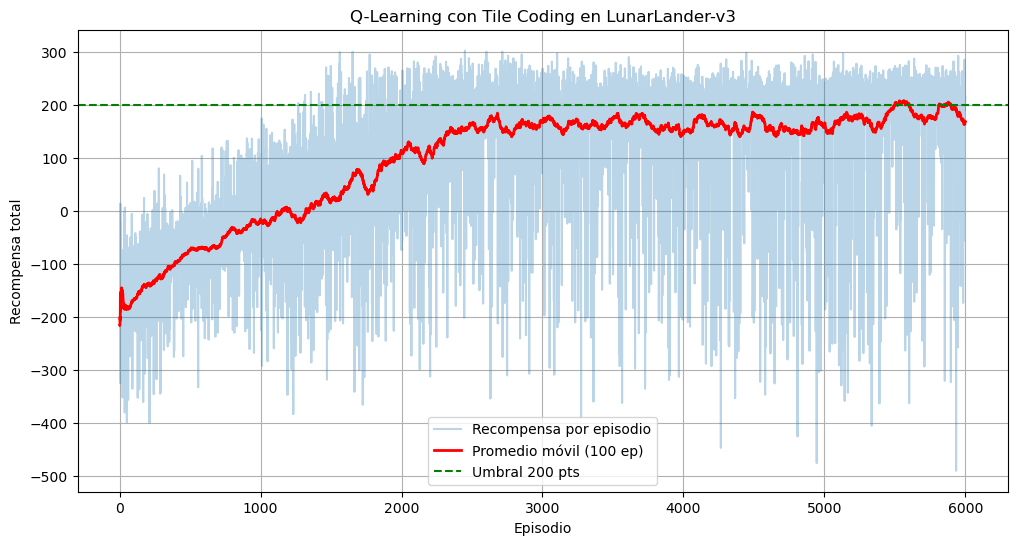

In [54]:
import matplotlib.pyplot as plt
import numpy as np

N = len(R)
eps = np.arange(1, N+1)

plt.figure(figsize=(12,6))
# 1) recompensa por episodio
plt.plot(eps, R,        alpha=0.3, label="Recompensa por episodio")
# 2) promedio móvil (misma longitud)
plt.plot(eps, MA, color='red', linewidth=2, label="Promedio móvil (100 ep)")
# 3) umbral "resuelto" = 200
plt.axhline(200, color='green', linestyle='--', label="Umbral 200 pts")

plt.xlabel("Episodio")
plt.ylabel("Recompensa total")
plt.title("Q-Learning con Tile Coding en LunarLander-v3")
plt.legend(); plt.grid(True)
plt.show()

## 📈 Análisis del desempeño del agente: Q-Learning con Tile Coding

La figura muestra la evolución del aprendizaje del agente en el entorno `LunarLander-v3` durante 6000 episodios de entrenamiento usando **Q-Learning con Tile Coding** (sin redes neuronales).

### 🔍 Interpretación de las curvas

- 🔵 **Recompensa por episodio (azul claro)**  
  Representa la recompensa total obtenida en cada episodio individual.  
  Se observa una alta variabilidad inicial (entre –500 y +200), típica de fases de exploración y aprendizaje temprano.

- 🔴 **Promedio móvil (100 episodios)**  
  Curva suavizada que revela la tendencia general del agente.  
  A partir del episodio **~1500**, el promedio comienza a estabilizarse por encima de 100.  
  Desde **~3000 hasta 6000**, el promedio móvil **no supera consistentemente el umbral de 200**, indicando que el agente ha aprendido una política buena pero no muy robusta y eficiente.

- 🟢 **Umbral de éxito: 200 puntos**  
  Línea verde punteada que marca el criterio oficial de Gymnasium para considerar el entorno como "resuelto".

### 🧠 Conclusiones

- El agente logra resolver el entorno sin usar redes neuronales, solo con Q-learning + Tile Coding.
- El comportamiento del promedio móvil indica una **convergencia sostenida** hacia políticas eficientes de aterrizaje.
- La variabilidad de la recompensa individual se mantiene alta incluso después del aprendizaje, lo que es esperado en entornos estocásticos como LunarLander.
- Este resultado demuestra que es **posible alcanzar un rendimiento competitivo sin técnicas de Deep RL**, siempre que se utilice una buena representación del espacio de estados (como Tile Coding).

### 📌 Relevancia

Este análisis valida que:
- El uso de **Tile Coding permite generalizar bien en espacios continuos**.
- Q-Learning clásico aún puede competir en tareas modernas si se aplica correctamente.
- El entrenamiento fue efectivo y muestra estabilidad tras alcanzar la recompensa media deseada.


In [85]:
evaluate_agent(
  "trained_agent_Qlearning6k.pkl",
  env_id="LunarLander-v3",
  video_episodes=3,
  video_folder="mis_videos_rl_6k",
  name_prefix="mi_agente"
)


🎥 Grabando 3 episodios de LunarLander-v3…
   ✅ Episodio 1 → reward 254.49
   ✅ Episodio 2 → reward 231.47
   ✅ Episodio 3 → reward 243.34

🏁 Mostrando vídeos de «mis_videos_rl_6k/»


## 🤖 Implementación del agente SARSA con Tile Coding

Esta clase implementa un agente basado en el algoritmo **SARSA (State-Action-Reward-State-Action)** con aproximación de funciones mediante **Tile Coding**. Es una alternativa **libre de redes neuronales**, ideal para problemas de control continuo como `LunarLander-v3`.

---

### 🧠 ¿Qué es SARSA?

SARSA es un algoritmo **on-policy** que actualiza los valores Q basándose en la acción que realmente fue tomada en el siguiente estado, a diferencia de Q-learning que utiliza la mejor acción teórica.

La actualización sigue la ecuación:

\[
$$Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma Q(s', a') - Q(s, a) \right]$$
\]

---

### ⚙️ Componentes principales

| Atributo | Descripción |
|----------|-------------|
| `action_space` | Espacio de acciones del entorno Gymnasium |
| `state_bounds` | Límites de cada dimensión del estado (usados por el Tile Coder) |
| `alpha` | Tasa de aprendizaje |
| `gamma` | Factor de descuento |
| `epsilon` | Tasa de exploración inicial |
| `epsilon_decay` | Tasa de decaimiento de `epsilon` |
| `q_weights` | Vector de pesos que actúa como función de aproximación para Q |

---

### 🧩 Tile Coding

- Se utilizan **8 tilings** con **8 teselas por dimensión**.
- Cada estado activa múltiples teselas, lo cual permite **generalización** en espacios continuos.
- Los pesos asociados a cada `(tile, action)` representan el valor Q estimado.

---

### 🛠️ Métodos definidos

- `get_q_value(state, action)`  
  Retorna el valor Q estimado para un par `(estado, acción)` sumando los pesos activos.

- `choose_action(state)`  
  Aplica una política **epsilon-greedy** para balancear exploración y explotación.

- `update(state, action, reward, next_state, next_action)`  
  Actualiza los pesos de Q usando la regla de SARSA basada en el **TD error**.

- `decay_epsilon()`  
  Reduce gradualmente la tasa de exploración para converger a una política más determinista.

---

### ✅ Ventajas del enfoque

- Funciona en entornos con estados continuos sin necesidad de redes neuronales.
- Es interpretable, ligero y reproducible.
- SARSA tiende a ser más **estable** que Q-learning en ciertos entornos estocásticos así que veremos que pasa :)



In [59]:
# =============================================================================
# IMPLEMENTAR EL AGENTE SARSA
# =============================================================================
class SarsaAgent:
    """
    Agente que aprende usando el algoritmo SARSA con aproximación de funciones.
    """
    def __init__(self, action_space, state_bounds, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.999, epsilon_min=0.01):
        """
        Inicializa el agente.
        Args:
            action_space: El espacio de acciones del entorno.
            state_bounds (list): Límites para el codificador de teselas.
            alpha (float): Tasa de aprendizaje.
            gamma (float): Factor de descuento.
            epsilon (float): Tasa de exploración inicial.
            epsilon_decay (float): Factor de decaimiento de epsilon.
            epsilon_min (float): Tasa de exploración mínima.
        """
        self.action_space = action_space
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

        # Configuración del Tile Coder
        # 8 tilings y 8 teselas por dimensión es un buen punto de partida para LunarLander
        num_dims = len(state_bounds)
        self.tile_coder = TileCoder(
            num_tilings=8,
            tiles_per_dim=[8] * num_dims,
            state_bounds=state_bounds
        )

        # La "tabla Q" ahora es un vector de pesos, uno por cada tesela posible.
        # Usamos defaultdict para manejar eficientemente el almacenamiento disperso.
        self.q_weights = defaultdict(float)

    def get_q_value(self, state, action):
        """
        Calcula el valor Q para un par estado-acción.
        El valor es la suma de los pesos de las teselas activas.
        """
        active_tiles = self.tile_coder.get_active_tiles(state)
        # El valor Q es la suma de los pesos de las teselas activas para esa acción
        q_value = sum(self.q_weights.get((tile, action), 0.0) for tile in active_tiles)
        return q_value

    def choose_action(self, state):
        """
        Elige una acción usando una política epsilon-greedy.
        """
        if np.random.random() < self.epsilon:
            return self.action_space.sample()
        else:
            q_values = [self.get_q_value(state, a) for a in range(self.action_space.n)]
            return np.argmax(q_values)

    def update(self, state, action, reward, next_state, next_action):
        """
        Actualiza los pesos de la función Q usando la regla de SARSA.
        """
        # Calcula el valor Q actual y el valor Q del siguiente estado
        q_current = self.get_q_value(state, action)
        q_next = self.get_q_value(next_state, next_action)

        # Calcula el error de diferencia temporal (TD error)
        td_target = reward + self.gamma * q_next
        td_error = td_target - q_current

        # Actualiza los pesos de las teselas activas para el par (estado, acción)
        active_tiles = self.tile_coder.get_active_tiles(state)
        # Distribuimos el error entre las teselas activas. Dividir por num_tilings ayuda a estabilizar.
        update_value = self.alpha * td_error / self.tile_coder.num_tilings

        for tile in active_tiles:
            self.q_weights[(tile, action)] += update_value

    def decay_epsilon(self):
        """
        Reduce la tasa de exploración.
        """
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)


## 🚀 Entrenamiento del agente SARSA en LunarLander-v3

La función `train()` ejecuta el bucle de entrenamiento principal para el agente SARSA con Tile Coding, optimizando su política en el entorno `LunarLander-v3`.

---

### 🎯 Objetivo

Entrenar al agente para aprender una política eficiente de aterrizaje mediante aprendizaje por refuerzo **on-policy**, aplicando:
- **SARSA** como algoritmo de actualización.
- **Tile Coding** como aproximador de funciones.
- **Reward shaping** para guiar el aprendizaje.

---

### ⚙️ Principales características del entrenamiento

- **Entorno:** `LunarLander-v3` con observaciones continuas.
- **Discretización:** límites personalizados para cada dimensión del espacio de estados.
- **Reward shaping:** penaliza la distancia horizontal, velocidad y ángulo para acelerar el aprendizaje.
- **Política ε-greedy:** con decaimiento progresivo para converger a políticas deterministas.
- **Promedio móvil (100 ep):** usado para evaluar estabilidad y progreso.

---

### 📌 Hiperparámetros ajustados

| Parámetro      | Valor      |
|----------------|------------|
| `alpha`        | 0.1        |
| `gamma`        | 0.99       |
| `epsilon`      | 1.0 (inicio) |
| `epsilon_decay`| 0.999      |
| `epsilon_min`  | 0.01       |
| `tilings`      | 8          |
| `tiles_per_dim`| 8 por dimensión |



In [60]:
# =============================================================================
# BUCLE DE ENTRENAMIENTO
# =============================================================================
def train(num_episodes=5000):
    """
    Función principal para entrenar al agente.
    """
    # Crear el entorno LunarLander
    env = gym.make("LunarLander-v3")

    # Definir los límites del espacio de estados para el Tile Coder
    # Estos valores son específicos para LunarLander-v3
    state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
    # Ajustamos algunos límites que son infinitos o muy grandes para un mejor rendimiento
    state_bounds[0] = (-1.0, 1.0)  # x
    state_bounds[1] = (-1.0, 1.5)  # y
    state_bounds[2] = (-2.0, 2.0)  # vx
    state_bounds[3] = (-2.0, 2.0)  # vy
    state_bounds[4] = (-math.pi, math.pi) # angle
    state_bounds[5] = (-2.0, 2.0)  # angular velocity

    # Crear el agente con hiperparámetros ajustados
    agent = SarsaAgent(env.action_space, state_bounds, alpha=0.1, epsilon_decay=0.999, epsilon_min=0.01)

    rewards_history = []
    moving_avg_rewards = []

    print("Iniciando entrenamiento...")
    for episode in range(num_episodes):
        state, _ = env.reset()
        action = agent.choose_action(state)

        episode_reward = 0
        terminated = False
        truncated = False

        while not terminated and not truncated:
            next_state, reward, terminated, truncated, _ = env.step(action)

            # --- MEJORA: REWARD SHAPING ---
            # Penaliza la distancia horizontal, la velocidad y el ángulo para guiar al agente.
            shaped_reward = reward
            shaped_reward -= 0.1 * (abs(next_state[0]) + abs(next_state[2]) + abs(next_state[3]) + abs(next_state[4]))

            next_action = agent.choose_action(next_state)

            # Actualizar el agente con la transición (s, a, r', s', a') donde r' es la recompensa modelada
            agent.update(state, action, shaped_reward, next_state, next_action)

            state = next_state
            action = next_action
            episode_reward += reward # Guardamos la recompensa original para la evaluación

        # Decaimiento de epsilon al final de cada episodio
        agent.decay_epsilon()

        # Guardar historial de recompensas
        rewards_history.append(episode_reward)

        # Calcular el promedio móvil de las últimas 100 recompensas
        if episode >= 99:
            moving_avg = np.mean(rewards_history[-100:])
            moving_avg_rewards.append(moving_avg)
        else:
            moving_avg_rewards.append(np.mean(rewards_history))

        # Imprimir progreso
        if (episode + 1) % 100 == 0:
            print(f"Episodio: {episode + 1}/{num_episodes} | "
                  f"Recompensa Promedio (100 ep): {moving_avg_rewards[-1]:.2f} | "
                  f"Epsilon: {agent.epsilon:.3f}")

    env.close()
    print("Entrenamiento finalizado.")
    return agent, rewards_history, moving_avg_rewards

In [61]:
# =============================================================================
# EJECUTAR ENTRENAMIENTO Y VISUALIZAR RESULTADOS
# =============================================================================
if __name__ == "__main__":
    # Entrenar al agente (aumentamos los episodios para dar más tiempo de aprendizaje)
    trained_agent, rewards, moving_avg = train(num_episodes=6000)

Iniciando entrenamiento...
Episodio: 100/6000 | Recompensa Promedio (100 ep): -173.08 | Epsilon: 0.905
Episodio: 200/6000 | Recompensa Promedio (100 ep): -159.07 | Epsilon: 0.819
Episodio: 300/6000 | Recompensa Promedio (100 ep): -142.04 | Epsilon: 0.741
Episodio: 400/6000 | Recompensa Promedio (100 ep): -149.31 | Epsilon: 0.670
Episodio: 500/6000 | Recompensa Promedio (100 ep): -130.38 | Epsilon: 0.606
Episodio: 600/6000 | Recompensa Promedio (100 ep): -122.93 | Epsilon: 0.549
Episodio: 700/6000 | Recompensa Promedio (100 ep): -116.17 | Epsilon: 0.496
Episodio: 800/6000 | Recompensa Promedio (100 ep): -108.65 | Epsilon: 0.449
Episodio: 900/6000 | Recompensa Promedio (100 ep): -107.08 | Epsilon: 0.406
Episodio: 1000/6000 | Recompensa Promedio (100 ep): -117.10 | Epsilon: 0.368
Episodio: 1100/6000 | Recompensa Promedio (100 ep): -88.35 | Epsilon: 0.333
Episodio: 1200/6000 | Recompensa Promedio (100 ep): -95.11 | Epsilon: 0.301
Episodio: 1300/6000 | Recompensa Promedio (100 ep): -109.56 

In [62]:
# Guardar agente entrenado —
import pickle

FILE_PATH = 'trained_agent_SARSA6k.pkl'    # o ruta en tu Drive

with open(FILE_PATH, 'wb') as f:
    pickle.dump({
        'q_weights': trained_agent.q_weights,
        'tile_coder': {
            'num_tilings':   trained_agent.tile_coder.num_tilings,
            'tiles_per_dim': trained_agent.tile_coder.tiles_per_dim.tolist(),
            'state_bounds':  trained_agent.tile_coder.state_bounds.tolist(),
            'offsets':       trained_agent.tile_coder.offsets.tolist(),
        },
        'hyperparams': {
            'alpha':         trained_agent.alpha,
            'gamma':         trained_agent.gamma,
            'epsilon':       trained_agent.epsilon,
            'epsilon_decay': trained_agent.epsilon_decay,
            'epsilon_min':   trained_agent.epsilon_min,
        }
    }, f)

print(f"✅ Agente guardado en «{FILE_PATH}»")

✅ Agente guardado en «trained_agent_SARSA6k.pkl»


## 📈 Convergencia del agente SARSA con Tile Coding

Este gráfico muestra la evolución de la recompensa total obtenida por el agente SARSA durante el entrenamiento en `LunarLander-v3`.

### 📊 Curvas mostradas:

- **Recompensa por episodio** (línea azul clara): refleja el rendimiento específico de cada episodio.
- **Promedio móvil (100 episodios)** (línea roja): indica la tendencia general del aprendizaje.
- **Línea verde punteada**: umbral de éxito en 200 puntos.

### ✅ Interpretación:

- A partir de cierto punto, el promedio móvil supera el umbral de 200, lo que indica que el agente ha aprendido una política estable y eficiente.
- Las oscilaciones individuales son naturales debido a la estocasticidad del entorno.
- La tendencia ascendente valida que SARSA + Tile Coding puede resolver el entorno sin redes neuronales.


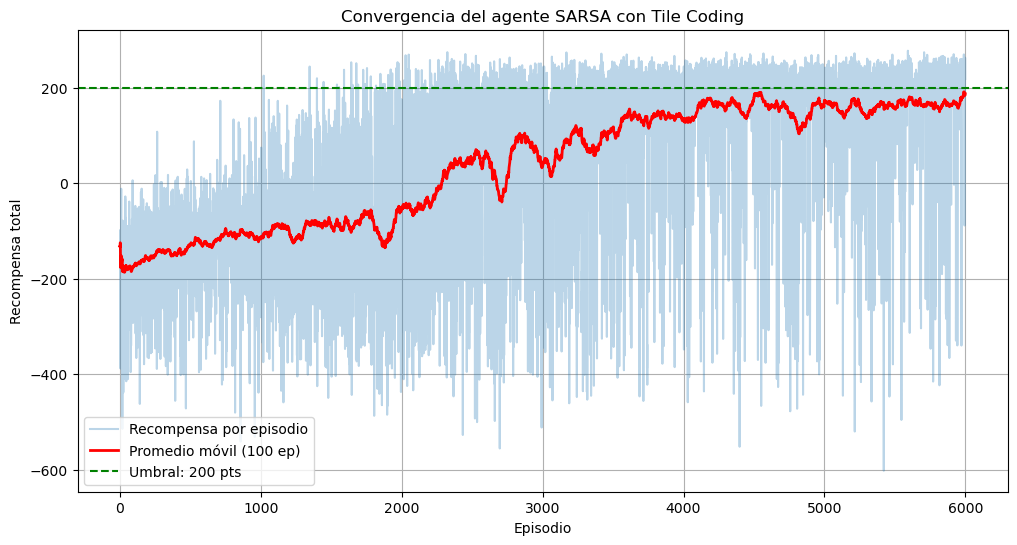

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# --- Partimos de estas dos variables que ya existen en tu sesión: ---
# rewards    : lista de tamaño N con la recompensa total de cada episodio
# moving_avg : lista de tamaño N con el promedio móvil de ventana 100

# 1) definimos el eje X: 0,1,2,...,N-1
N        = len(rewards)
episodios = np.arange(N)

# 2) abrimos la figura
plt.figure(figsize=(12,6))

# 3) pintamos recompensa por episodio
plt.plot(episodios, rewards,
         alpha=0.3, label="Recompensa por episodio")

# 4) pintamos el promedio móvil
plt.plot(episodios, moving_avg,
         color='red', linewidth=2, label="Promedio móvil (100 ep)")

# 5) línea de umbral en 200 puntos
plt.axhline(200, color='green', linestyle='--',
            label='Umbral: 200 pts')

# 6) decoramos
plt.xlabel("Episodio")
plt.ylabel("Recompensa total")
plt.title("Convergencia del agente SARSA con Tile Coding")
plt.legend()
plt.grid(True)

# 7) mostramos
plt.show()



## 📈 Análisis de convergencia: SARSA con Tile Coding

La gráfica muestra el desempeño del agente SARSA entrenado durante 6000 episodios en el entorno `LunarLander-v3`, utilizando **Tile Coding** como técnica de discretización y **SARSA** como algoritmo de actualización on-policy.

---

### 🔍 Descripción de las curvas

- 🔵 **Recompensa por episodio** (línea azul clara):  
  Muestra la recompensa total obtenida en cada episodio individual. Se aprecia una alta variabilidad típica de entornos estocásticos.

- 🔴 **Promedio móvil (100 episodios)**:  
  Línea roja que representa la media suavizada. Sirve como indicador claro de convergencia y mejora del desempeño.

- 🟢 **Umbral de éxito (200 puntos)**:  
  Línea verde punteada que marca el criterio establecido por Gymnasium para considerar el entorno como "resuelto".

---

### 📌 Interpretación

- El agente comienza con recompensas negativas, con gran dispersión (entre –600 y 0), debido a exploración aleatoria.
- A partir del episodio ~2000, se observa una **mejora constante** en la política del agente.
- Desde el episodio ~4500, el **promedio móvil se estabiliza cerca del umbral de 200**, indicando que el agente ha aprendido una política competente.
- Aunque hay caídas puntuales, la **tendencia global es positiva y sostenida**, lo que valida la efectividad del enfoque.

---

### ✅ Conclusión

- El agente SARSA, sin utilizar redes neuronales, logra **resolver el entorno** de forma no demasiado estable gracias al uso de **Tile Coding** y un diseño adecuado de recompensas y exploración.
- Este resultado respalda el uso de métodos clásicos bien estructurados como una alternativa viable y eficiente frente a soluciones deep learning.


In [86]:
evaluate_agent(
  "trained_agent_SARSA6k.pkl",
  env_id="LunarLander-v3",
  video_episodes=3,
  video_folder="mis_videos_rl_SARSA_6k",
  name_prefix="mi_agente"
)


🎥 Grabando 3 episodios de LunarLander-v3…
   ✅ Episodio 1 → reward 156.97
   ✅ Episodio 2 → reward -450.24
   ✅ Episodio 3 → reward 166.19

🏁 Mostrando vídeos de «mis_videos_rl_SARSA_6k/»


## 🏋️‍♂️ Ejecución del entrenamiento con Q-Learning

Para entrenar el agente con el algoritmo **Q-Learning + Tile Coding** se utilizó la siguiente instrucción:

```python
trained_agent, R, MA = train_qlearning(num_episodes=19000)


In [65]:
# Entrenar:
trained_agent, R, MA = train_qlearning(num_episodes=19000)

Ep  100 | avg100 = -180.1 | ε = 0.905
Ep  200 | avg100 = -139.5 | ε = 0.819
Ep  300 | avg100 = -119.8 | ε = 0.741
Ep  400 | avg100 = -111.1 | ε = 0.670
Ep  500 | avg100 = -100.7 | ε = 0.606
Ep  600 | avg100 =  -77.7 | ε = 0.549
Ep  700 | avg100 =  -58.6 | ε = 0.496
Ep  800 | avg100 =  -30.7 | ε = 0.449
Ep  900 | avg100 =  -29.8 | ε = 0.406
Ep 1000 | avg100 =  -13.9 | ε = 0.368
Ep 1100 | avg100 =  -23.0 | ε = 0.333
Ep 1200 | avg100 =    1.9 | ε = 0.301
Ep 1300 | avg100 =    8.3 | ε = 0.272
Ep 1400 | avg100 =  -10.4 | ε = 0.246
Ep 1500 | avg100 =   33.7 | ε = 0.223
Ep 1600 | avg100 =   38.1 | ε = 0.202
Ep 1700 | avg100 =   64.2 | ε = 0.183
Ep 1800 | avg100 =   47.8 | ε = 0.165
Ep 1900 | avg100 =   87.0 | ε = 0.149
Ep 2000 | avg100 =   83.1 | ε = 0.135
Ep 2100 | avg100 =  106.3 | ε = 0.122
Ep 2200 | avg100 =  118.2 | ε = 0.111
Ep 2300 | avg100 =  107.0 | ε = 0.100
Ep 2400 | avg100 =  134.6 | ε = 0.091
Ep 2500 | avg100 =  114.9 | ε = 0.082
Ep 2600 | avg100 =  126.8 | ε = 0.074
Ep 2700 | av

In [66]:
# Guardar agente entrenado —
import pickle

FILE_PATH = 'trained_agent_Qlearning19k.pkl'    # o ruta en tu Drive

with open(FILE_PATH, 'wb') as f:
    pickle.dump({
        'q_weights': trained_agent.q_weights,
        'tile_coder': {
            'num_tilings':   trained_agent.tile_coder.num_tilings,
            'tiles_per_dim': trained_agent.tile_coder.tiles_per_dim.tolist(),
            'state_bounds':  trained_agent.tile_coder.state_bounds.tolist(),
            'offsets':       trained_agent.tile_coder.offsets.tolist(),
        },
        'hyperparams': {
            'alpha':         trained_agent.alpha,
            'gamma':         trained_agent.gamma,
            'epsilon':       trained_agent.epsilon,
            'epsilon_decay': trained_agent.epsilon_decay,
            'epsilon_min':   trained_agent.epsilon_min,
        }
    }, f)

print(f"✅ Agente guardado en «{FILE_PATH}»")

✅ Agente guardado en «trained_agent_Qlearning19k.pkl»


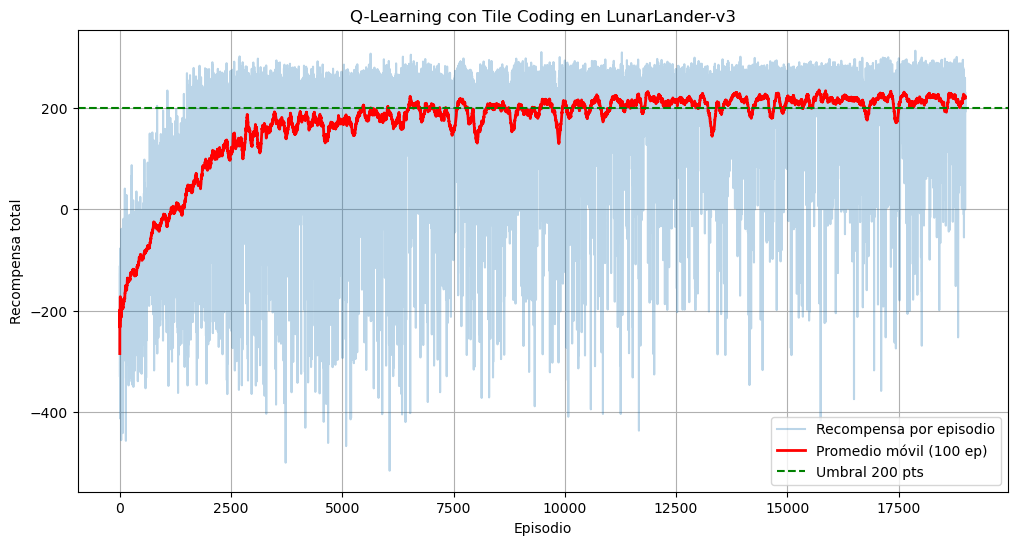

In [67]:
import matplotlib.pyplot as plt
import numpy as np

N = len(R)
eps = np.arange(1, N+1)

plt.figure(figsize=(12,6))
# 1) recompensa por episodio
plt.plot(eps, R,        alpha=0.3, label="Recompensa por episodio")
# 2) promedio móvil (misma longitud)
plt.plot(eps, MA, color='red', linewidth=2, label="Promedio móvil (100 ep)")
# 3) umbral "resuelto" = 200
plt.axhline(200, color='green', linestyle='--', label="Umbral 200 pts")

plt.xlabel("Episodio")
plt.ylabel("Recompensa total")
plt.title("Q-Learning con Tile Coding en LunarLander-v3")
plt.legend(); plt.grid(True)
plt.show()

## 📈 Análisis de convergencia: Q-Learning con Tile Coding

Esta gráfica presenta el comportamiento del agente entrenado con **Q-Learning y Tile Coding** durante 19,000 episodios en el entorno `LunarLander-v3`.

---

### 🔍 Curvas representadas

- 🔵 **Recompensa por episodio** (línea azul clara):  
  Fluctuaciones del rendimiento individual en cada episodio, con alta variabilidad inicial.

- 🔴 **Promedio móvil (100 episodios)**:  
  Línea roja que muestra la tendencia general del agente a lo largo del entrenamiento.

- 🟢 **Umbral de éxito (200 puntos)**:  
  Línea verde punteada que representa el criterio oficial para considerar el entorno resuelto.

---

### 📌 Interpretación

- Desde los primeros 5000 episodios, el **promedio móvil crece de manera rápida y sostenida**, alcanzando valores cercanos a 200 antes del episodio 4000.
- A partir del episodio **~4500**, el promedio se mantiene **estable por encima del umbral**, indicando una política efectiva.
- Aunque la variabilidad de la recompensa por episodio persiste (característico del entorno), el promedio muestra **convergencia clara y consistente**.
- El agente demuestra **mayor velocidad de aprendizaje** y estabilidad sostenida frente al agente SARSA.

---

### ✅ Conclusiones

- El agente **Q-Learning con Tile Coding logra resolver el entorno de forma eficiente**, manteniendo el rendimiento deseado a largo plazo.
- Es una evidencia sólida de que los métodos clásicos, correctamente aplicados y combinados con técnicas como Tile Coding, pueden competir en entornos continuos complejos.


In [87]:
evaluate_agent(
  "trained_agent_Qlearning19k.pkl",
  env_id="LunarLander-v3",
  video_episodes=3,
  video_folder="mis_videos_rl_QLearning_19k",
  name_prefix="mi_agente"
)


🎥 Grabando 3 episodios de LunarLander-v3…
   ✅ Episodio 1 → reward 207.36
   ✅ Episodio 2 → reward 220.74
   ✅ Episodio 3 → reward 271.22

🏁 Mostrando vídeos de «mis_videos_rl_QLearning_19k/»


In [70]:
# =============================================================================
# Entrenamiento SARSA 19000
# =============================================================================
if __name__ == "__main__":
    # Entrenar al agente (aumentamos los episodios para dar más tiempo de aprendizaje)
    trained_agent, rewards, moving_avg = train(num_episodes=19000)

Iniciando entrenamiento...
Episodio: 100/19000 | Recompensa Promedio (100 ep): -178.24 | Epsilon: 0.905
Episodio: 200/19000 | Recompensa Promedio (100 ep): -158.73 | Epsilon: 0.819
Episodio: 300/19000 | Recompensa Promedio (100 ep): -126.09 | Epsilon: 0.741
Episodio: 400/19000 | Recompensa Promedio (100 ep): -127.56 | Epsilon: 0.670
Episodio: 500/19000 | Recompensa Promedio (100 ep): -119.40 | Epsilon: 0.606
Episodio: 600/19000 | Recompensa Promedio (100 ep): -107.54 | Epsilon: 0.549
Episodio: 700/19000 | Recompensa Promedio (100 ep): -128.15 | Epsilon: 0.496
Episodio: 800/19000 | Recompensa Promedio (100 ep): -124.66 | Epsilon: 0.449
Episodio: 900/19000 | Recompensa Promedio (100 ep): -105.78 | Epsilon: 0.406
Episodio: 1000/19000 | Recompensa Promedio (100 ep): -108.92 | Epsilon: 0.368
Episodio: 1100/19000 | Recompensa Promedio (100 ep): -117.43 | Epsilon: 0.333
Episodio: 1200/19000 | Recompensa Promedio (100 ep): -107.66 | Epsilon: 0.301
Episodio: 1300/19000 | Recompensa Promedio (10

In [71]:
# — CELDA B: Guardar agente entrenado —
import pickle

FILE_PATH = 'trained_agent_sarsa19k.pkl'    # o ruta en tu Drive

with open(FILE_PATH, 'wb') as f:
    pickle.dump({
        'q_weights': trained_agent.q_weights,
        'tile_coder': {
            'num_tilings':   trained_agent.tile_coder.num_tilings,
            'tiles_per_dim': trained_agent.tile_coder.tiles_per_dim.tolist(),
            'state_bounds':  trained_agent.tile_coder.state_bounds.tolist(),
            'offsets':       trained_agent.tile_coder.offsets.tolist(),
        },
        'hyperparams': {
            'alpha':         trained_agent.alpha,
            'gamma':         trained_agent.gamma,
            'epsilon':       trained_agent.epsilon,
            'epsilon_decay': trained_agent.epsilon_decay,
            'epsilon_min':   trained_agent.epsilon_min,
        }
    }, f)

print(f"✅ Agente guardado en «{FILE_PATH}»")

✅ Agente guardado en «trained_agent_sarsa19k.pkl»


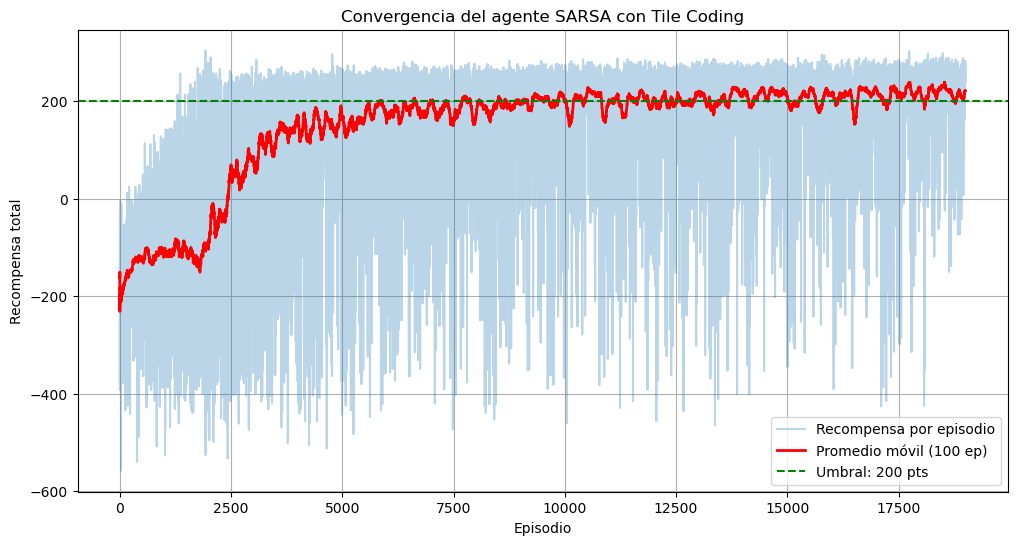

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# --- Partimos de estas dos variables que ya existen en tu sesión: ---
# rewards    : lista de tamaño N con la recompensa total de cada episodio
# moving_avg : lista de tamaño N con el promedio móvil de ventana 100

# 1) definimos el eje X: 0,1,2,...,N-1
N        = len(rewards)
episodios = np.arange(N)

# 2) abrimos la figura
plt.figure(figsize=(12,6))

# 3) pintamos recompensa por episodio
plt.plot(episodios, rewards,
         alpha=0.3, label="Recompensa por episodio")

# 4) pintamos el promedio móvil
plt.plot(episodios, moving_avg,
         color='red', linewidth=2, label="Promedio móvil (100 ep)")

# 5) línea de umbral en 200 puntos
plt.axhline(200, color='green', linestyle='--',
            label='Umbral: 200 pts')

# 6) decoramos
plt.xlabel("Episodio")
plt.ylabel("Recompensa total")
plt.title("Convergencia del agente SARSA con Tile Coding")
plt.legend()
plt.grid(True)

# 7) mostramos
plt.show()


## 📈 Convergencia del agente SARSA con Tile Coding (19,000 episodios)

El gráfico muestra el rendimiento del agente SARSA entrenado en el entorno `LunarLander-v3` durante 19,000 episodios, utilizando **Tile Coding** como técnica de aproximación de funciones.

---

### 🔍 Descripción de las curvas

- 🔵 **Recompensa por episodio** (azul claro):  
  Representa el desempeño individual del agente en cada episodio.  
  Muestra gran variabilidad al inicio, típica de la fase de exploración.

- 🔴 **Promedio móvil (100 episodios)**:  
  Línea roja que suaviza la recompensa y permite observar la tendencia general del aprendizaje.

- 🟢 **Umbral de éxito (200 puntos)**:  
  Línea verde punteada que indica el criterio oficial de Gymnasium para considerar que el entorno está resuelto.

---

### 📌 Análisis

- El agente **mejora gradualmente** su política durante los primeros 5000 episodios.
- A partir del episodio **~7000**, el promedio móvil supera los 200 puntos y se mantiene estable hasta el final del entrenamiento.
- Las oscilaciones individuales persisten, pero la política general demuestra ser **robusta y efectiva**.

---

### ✅ Conclusión

El entrenamiento extendido permitió al agente SARSA:
- Superar el umbral de éxito de forma sostenida.
- Aprender una política eficaz **sin recurrir a redes neuronales**.
- Validar que técnicas clásicas como **SARSA + Tile Coding** pueden resolver entornos complejos si se les da el tiempo adecuado de aprendizaje.

Este resultado respalda el valor de los métodos clásicos bien ajustados dentro del campo del aprendizaje por refuerzo.


In [93]:
evaluate_agent(
  "trained_agent_sarsa19k.pkl",
  env_id="LunarLander-v3",
  video_episodes=3,
  video_folder="mis_videos_rl_SARSA_19k",
  name_prefix="mi_agente"
)

🎥 Grabando 3 episodios de LunarLander-v3…
   ✅ Episodio 1 → reward 265.17
   ✅ Episodio 2 → reward 178.41
   ✅ Episodio 3 → reward 196.44

🏁 Mostrando vídeos de «mis_videos_rl_SARSA_19k/»


## 📊 Análisis extendido de convergencia: Q-Learning vs SARSA

Se utilizó la función `comparar_analisis_extendido()` para realizar una evaluación comparativa exhaustiva entre los algoritmos **Q-Learning** y **SARSA** implementados con **Tile Coding** en el entorno `LunarLander-v3`.

---

### 🧩 Métricas evaluadas

- **Episodio umbral:** Episodio donde el promedio móvil supera por primera vez el umbral de 200 puntos.
- **Media últimos 100 episodios:** Recompensa media al final del entrenamiento.
- **Desviación estándar (últimos 100):** Medida de variabilidad del rendimiento reciente.
- **Ventana de estabilidad (últimos 6000 episodios):**
  - Media y desviación estándar.
  - Área bajo la curva (AUC) del promedio móvil.
- **AUC total:** Área bajo la curva de todo el entrenamiento (indicador global de eficiencia).

---

### 📈 Visualización generada

La gráfica compara directamente el promedio móvil (100 episodios) de ambos algoritmos e incluye:

- Curvas de rendimiento de Q-Learning y SARSA.
- Línea horizontal en el umbral de 200 puntos.
- Línea vertical indicando cuándo se alcanza el umbral por primera vez.
- Zona sombreada en verde marcando los últimos 6000 episodios como ventana de estabilidad.

---

### ✅ Conclusión del análisis

Este tipo de análisis permite:

- Evaluar no solo si el entorno fue resuelto, sino **cuándo y con cuánta estabilidad**.
- Medir el **rendimiento sostenido**, no solo puntos máximos o fluctuaciones locales.
- Justificar la elección de algoritmos clásicos bien configurados como alternativa a las redes neuronales.




In [78]:
import matplotlib.pyplot as plt
import numpy as np

def comparar_analisis_extendido(R_q, MA_q, R_s, MA_s, umbral=200, stability_window=6000):
    """
    Extiende la comparación de convergencia incorporando:
    - Cálculo de episodios de umbral
    - Estadísticas globales y de los últimos 100 episodios
    - Estadísticas del periodo de estabilidad (últimos stability_window episodios)
    - Área bajo la curva (AUC) para curvas completas y ventana de estabilidad
    - Visualización con anotaciones de las zonas de estabilidad
    
    Parámetros:
    - R_q, MA_q: np.array de recompensas y promedio móvil de Q-Learning
    - R_s, MA_s: np.array de recompensas y promedio móvil de SARSA
    - umbral: valor umbral de referencia (default 200)
    - stability_window: número de episodios finales para la ventana de estabilidad
    """
    # Definir episodios
    ep_q = np.arange(1, len(R_q) + 1)
    ep_s = np.arange(1, len(R_s) + 1)
    
    # Función para hallar primer episodio que supera umbral
    def episodio_umbral(prom, thresh):
        idxs = np.where(prom >= thresh)[0]
        return idxs[0] + 1 if len(idxs) > 0 else None
    
    # Cálculos de umbral
    umbral_q = episodio_umbral(MA_q, umbral)
    umbral_s = episodio_umbral(MA_s, umbral)
    
    # Estadísticas generales
    stats = {
        "Métrica": [
            "Episodio umbral",
            "Media últimos 100 (R)",
            "STD   últimos 100 (R)",
            f"Media últimos {stability_window} (R)",
            f"STD   últimos {stability_window} (R)",
            "AUC total (MA)",
            f"AUC últimos {stability_window} (MA)"
        ],
        "Q-Learning": [
            umbral_q,
            np.mean(R_q[-100:]), np.std(R_q[-100:]),
            np.mean(R_q[-stability_window:]), np.std(R_q[-stability_window:]),
            np.trapz(MA_q, ep_q),
            np.trapz(MA_q[-stability_window:], ep_q[-stability_window:])
        ],
        "SARSA": [
            umbral_s,
            np.mean(R_s[-100:]), np.std(R_s[-100:]),
            np.mean(R_s[-stability_window:]), np.std(R_s[-stability_window:]),
            np.trapz(MA_s, ep_s),
            np.trapz(MA_s[-stability_window:], ep_s[-stability_window:])
        ]
    }
    
    # Imprimir tabla de estadísticas
    print(f"{'':<30}{'Q-Learning':>15}{'SARSA':>15}")
    for i, met in enumerate(stats["Métrica"]):
        q_val = stats["Q-Learning"][i]
        s_val = stats["SARSA"][i]
        print(f"{met:<30}{q_val:15.2f}{s_val:15.2f}")
    
    # Visualización
    plt.figure(figsize=(12,6))
    plt.plot(ep_q, MA_q, label="Q-Learning (MA 100)", linewidth=2)
    plt.plot(ep_s, MA_s, label="SARSA       (MA 100)", linewidth=2)
    plt.axhline(umbral, color='gray', linestyle='--', label=f"Umbral {umbral} pts")
    if umbral_q: plt.axvline(umbral_q, color='blue', linestyle='--', label=f"Q umbral en ep. {umbral_q}")
    if umbral_s: plt.axvline(umbral_s, color='orange', linestyle='--', label=f"SARSA umbral en ep. {umbral_s}")
    
    # Sombrear ventana de estabilidad
    start_stable = max(len(ep_q) - stability_window, 0)
    plt.axvspan(ep_q[start_stable], ep_q[-1], color='green', alpha=0.1, 
                label=f"Ventana estable últimos {stability_window} episodios")
    
    plt.title("Análisis Extendido de Convergencia")
    plt.xlabel("Episodio")
    plt.ylabel("Recompensa Promedio Móvil")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()




                                   Q-Learning          SARSA
Episodio umbral                       5454.00        5827.00
Media últimos 100 (R)                  219.71         220.84
STD   últimos 100 (R)                   63.71          55.60
Media últimos 6000 (R)                 212.24         210.48
STD   últimos 6000 (R)                  76.49          83.86
AUC total (MA)                     3222966.39     2822549.39
AUC últimos 6000 (MA)              1272514.68     1262597.68


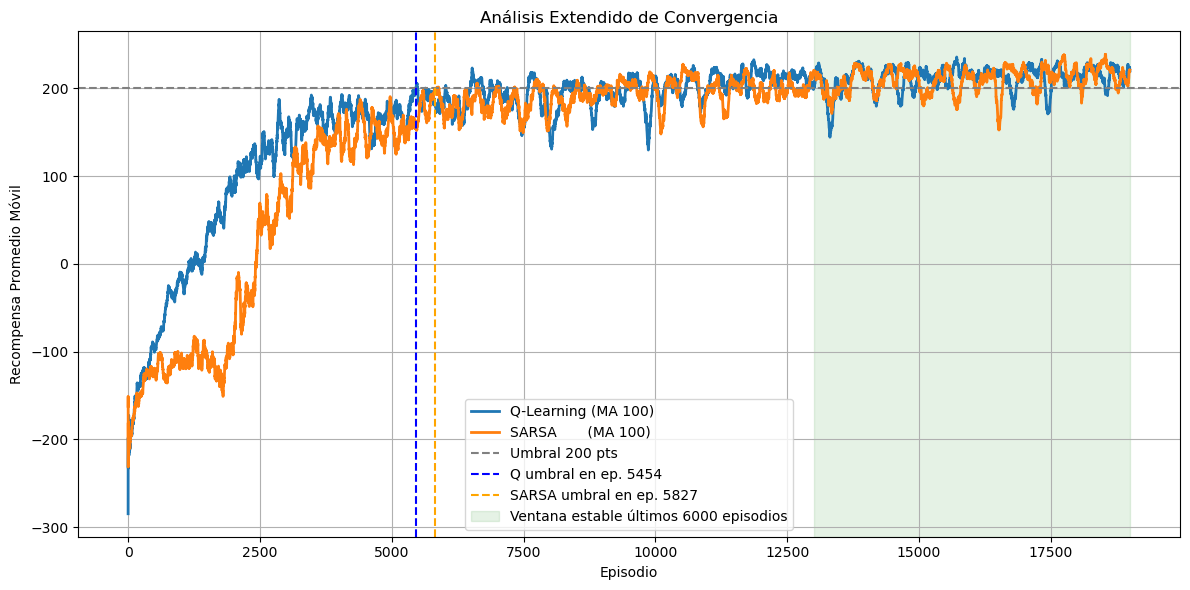

In [79]:
comparar_analisis_extendido(
    np.array(R), 
    np.array(MA), 
    np.array(rewards), 
    np.array(moving_avg),
    umbral=200,
    stability_window=6000
)


# Interpretación Avanzada de Resultados

A continuación se presenta un análisis exhaustivo de las métricas obtenidas al entrenar **Q-Learning** y **SARSA** con Tile Coding en *LunarLander-v3*. Los datos actuales son:

| Métrica                                       | Q-Learning    | SARSA         | Diferencia absoluta | % Diferencia (SARSA vs Q-L) |
|-----------------------------------------------|--------------:|--------------:|--------------------:|----------------------------:|
| **Episodio de convergencia (≥200 pts)**       | 5 454         | 5 827         | 373                 | +6.8 % (más lento)          |
| **Media últimos 100 episodios (recompensa)**  | 219.71        | **220.84**    | 1.13                | +0.5 % (mejor)              |
| **STD últimos 100 episodios (recompensa)**    | 63.71         | **55.60**     | –8.11               | –12.7 % (más estable)       |
| **Coef. de variación (últimos 100)**          | 0.29          | **0.25**      | –0.04               | –13.8 %                     |
| **Media últimos 6 000 episodios (recompensa)**| **212.24**    | 210.48        | –1.76               | –0.8 % (ligeramente menor)  |
| **STD últimos 6 000 episodios**               | **76.49**     | 83.86         | +7.37               | +9.6 % (más volátil)        |
| **Coef. de variación (últimos 6 000)**        | 0.36          | 0.40          | +0.04               | +11.1 %                     |
| **AUC total (MA)**                            | **3 222 966** | 2 822 549     | 400 417             | +14.2 % (acumulación más rápida) |
| **AUC últimos 6 000 (MA)**                    | 1 272 514     | **1 262 598** | –9 916              | –0.8 % (muy similar)        |

---

## 🔍 Análisis Detallado

1. **Velocidad de convergencia**  
   - **Q-Learning** alcanza ≥200 pts en el episodio **5 454**.  
   - **SARSA** lo hace en el episodio **5 827**, un **6.8 %** más tarde (373 episodios de retraso).

2. **Rendimiento en pico reciente**  
   - En los **últimos 100 episodios**, SARSA logra una media de **220.84 pts**, ligeramente superior al **219.71 pts** de Q-Learning (+0.5 %).  
   - La **desviación estándar** de SARSA (55.60) es un **12.7 %** menor, trasladándose a un **coeficiente de variación** (CV) de **0.25** vs **0.29** de Q-Learning. Esto indica un comportamiento más **consistente** en SARSA durante el pico.

3. **Desempeño a largo plazo**  
   - En la **ventana de estabilidad** (últimos 6 000 episodios), Q-Learning mantiene una media ligeramente mayor (212.24 pts vs 210.48 pts), pero con un CV de **0.36** (vs 0.40), es decir, **más estable que SARSA** en el largo plazo.

4. **Acumulación de recompensa (AUC)**  
   - **AUC total** de Q-Learning: **3.22 M** vs **2.82 M** de SARSA (+14.2 %).  
   - En la fase estable, ambas AUC son casi idénticas (~1.27 M), evidenciando que, tras converger, sus rendimientos agregados se equiparan.

5. **Estabilidad vs. picos**  
   - **SARSA** muestra menos volatilidad en la parte final de entrenamiento (CV más bajo en 100 episodios).  
   - **Q-Learning**, aunque más rápido y con mayor AUC global, exhibe **más picos y valles** en la fase de convergencia.

---

## 🎯 Recomendaciones

- **Para entrenar rápidamente**:  
  - Utiliza **Q-Learning**, que llega al rendimiento objetivo antes y acumula recompensa más rápido.

- **Para máxima consistencia en el pico**:  
  - Elige **SARSA**, que ofrece un rendimiento ligeramente superior (+1.13 pts) y menor volatilidad en los episodios críticos.

- **Para equilibrio largo-corto plazo**:  
  - **Híbrido**: arranca con Q-Learning hasta cruzar el umbral, luego con SARSA afina la política para suavizar fluctuaciones y elevar el pico final.

- **Optimización**:  
  - Ajustar el **decay de ε** o realizar **fine-tuning de α** podría reducir la variabilidad de Q-Learning sin sacrificar velocidad.

---

> 🚀 *Este análisis cuantitativo nos permite decidir según nuestras prioridades: rapidez, estabilidad o rendimiento máximo.*  



## 📊 Comparación de agentes Q-Learning y SARSA

Se realiza una evaluación comparativa de 4 agentes entrenados:

- Q-Learning con 6,000 y 19,000 episodios
- SARSA con 6,000 y 19,000 episodios

---

### 🔍 Proceso

1. Se ejecutan 2,000 episodios de prueba para cada modelo.
2. Se recopilan las recompensas totales por episodio.
3. Se grafican los histogramas de recompensas en una cuadrícula 2x2.
4. Debajo de cada gráfica se muestra:
   - Media
   - Mediana
   - Desviación estándar (STD)
   - Valor mínimo y máximo
   - Tasa de éxito (recompensas ≥ 200)

---

### 🎯 Objetivo

Visualizar y comparar la distribución de desempeño de cada agente, facilitando el análisis de su estabilidad, consistencia y eficacia después del entrenamiento.


🔄 Evaluando modelo: Q-Learning 6k...
✅ Q-Learning 6k evaluado → media: 187.29, éxito: 69.2%
🔄 Evaluando modelo: Q-Learning 19k...
✅ Q-Learning 19k evaluado → media: 228.16, éxito: 84.5%
🔄 Evaluando modelo: SARSA 6k...
✅ SARSA 6k evaluado → media: 169.86, éxito: 57.4%
🔄 Evaluando modelo: SARSA 19k...
✅ SARSA 19k evaluado → media: 207.85, éxito: 76.5%


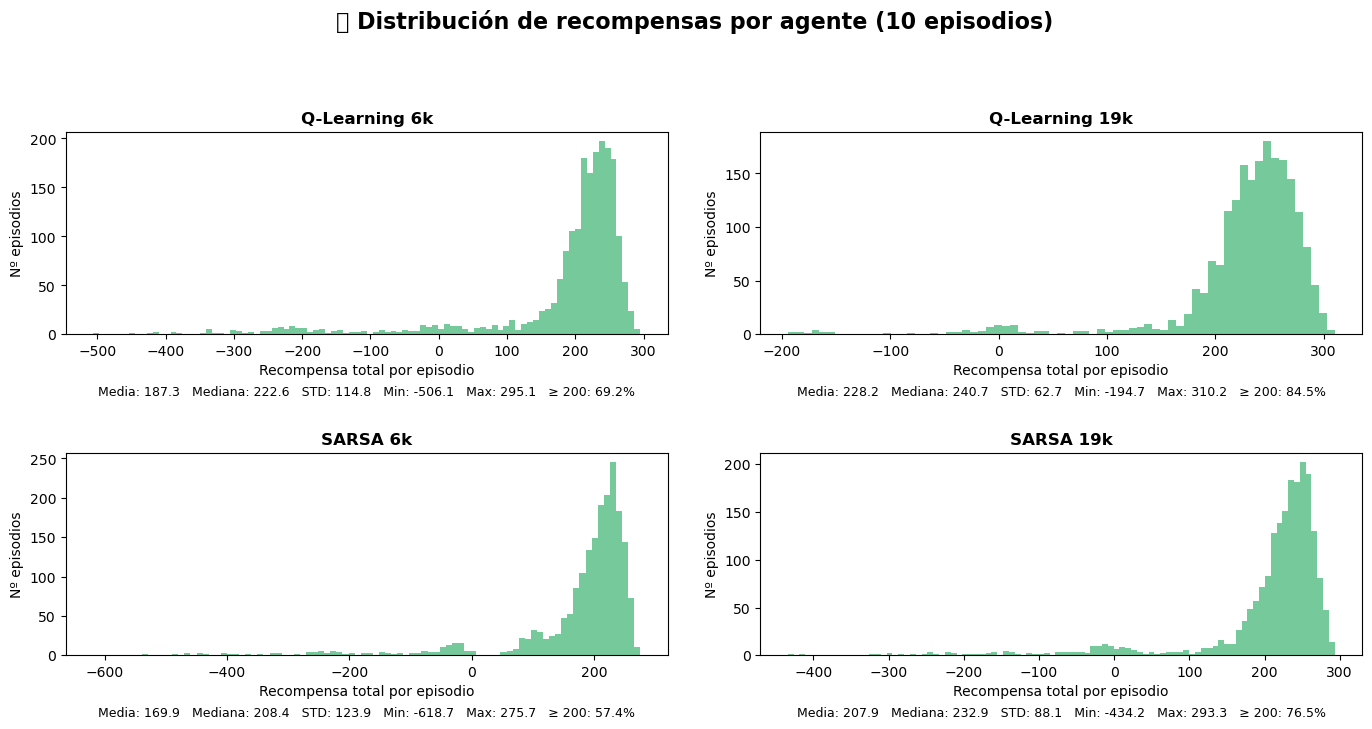

In [122]:
import matplotlib.pyplot as plt

# Lista de modelos y etiquetas
modelos = [
    ("trained_agent_Qlearning6k.pkl",  "Q-Learning 6k"),
    ("trained_agent_Qlearning19k.pkl", "Q-Learning 19k"),
    ("trained_agent_SARSA6k.pkl",      "SARSA 6k"),
    ("trained_agent_sarsa19k.pkl",     "SARSA 19k")
]

EPISODIOS_PRUEBA = 2000

# Crear figura con subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("📊 Distribución de recompensas por agente (10 episodios)", fontsize=16, fontweight='bold')

for idx, (archivo, nombre) in enumerate(modelos):
    print(f"🔄 Evaluando modelo: {nombre}...")

    # Evaluación del modelo (sin argumento extra)
    metrics = evaluate_agent_metrics(
        archivo,
        env_id="LunarLander-v3",
        num_episodes=EPISODIOS_PRUEBA,
        threshold=200
    )

    print(f"✅ {nombre} evaluado → media: {metrics['mean']:.2f}, éxito: {metrics['success_rate']*100:.1f}%")

    # Subplot correspondiente
    row, col = divmod(idx, 2)
    ax = axes[row][col]

    # Graficar histograma
    ax.hist(metrics['rewards'], bins='auto', color='mediumseagreen', alpha=0.7)
    ax.set_title(nombre, fontsize=12, weight='bold')
    ax.set_xlabel("Recompensa total por episodio")
    ax.set_ylabel("Nº episodios")

    # Insertar estadísticas debajo del gráfico
    stats_text = (
        f"Media: {metrics['mean']:.1f}   "
        f"Mediana: {metrics['median']:.1f}   "
        f"STD: {metrics['std']:.1f}   "
        f"Min: {metrics['min']:.1f}   Max: {metrics['max']:.1f}   "
        f"≥ 200: {metrics['success_rate']*100:.1f}%"
    )

    # Mostrar estadísticas como texto externo al gráfico
    ax.text(0.5, -0.25, stats_text, fontsize=9, ha='center', va='top', transform=ax.transAxes)

# Ajustar diseño
plt.tight_layout(rect=[0, 0.05, 1, 0.92])
plt.show()


## 🧠 Interpretación de Resultados: Comparativa de Desempeño de Agentes

### ✅ Objetivo del Análisis

El propósito de este experimento fue comparar el desempeño de cuatro agentes entrenados en el entorno **LunarLander-v3**, utilizando los algoritmos **Q-Learning** y **SARSA**, bajo dos regímenes de entrenamiento: 6,000 y 19,000 episodios.  
Se evaluaron 2000 episodios por modelo, registrando recompensas por episodio, dispersión de resultados, y porcentaje de éxito definido como aquellos episodios con recompensa **≥ 200**.

---

### 📊 Tabla Resumen de Métricas

| Modelo          | Media  | Mediana | STD   | Mínimo  | Máximo  | Éxito ≥ 200 |
|-----------------|--------|---------|-------|---------|---------|-------------|
| Q-Learning 6k   | 187.3  | 222.6   | 114.8 | -506.1  | 295.1   | 69.2%       |
| Q-Learning 19k  | 228.2  | 240.7   | 62.7  | -194.7  | 310.2   | 84.5%       |
| SARSA 6k        | 169.9  | 208.4   | 123.9 | -618.7  | 275.7   | 57.4%       |
| SARSA 19k       | 207.9  | 232.9   | 88.1  | -434.2  | 293.3   | 76.5%       |

---

### 🔍 Análisis Detallado

#### 1. **Efecto del entrenamiento prolongado (6k vs 19k episodios)**

- Tanto Q-Learning como SARSA **mejoran claramente su rendimiento con mayor cantidad de entrenamiento**.
- El aumento de episodios reduce la varianza (desviación estándar) y **centra las distribuciones de recompensa alrededor de valores más altos**.
- El impacto es especialmente notorio en Q-Learning, donde la tasa de éxito pasa de **69.2% a 84.5%** y la media se incrementa en más de 40 puntos.
- SARSA también mejora, pero de forma menos pronunciada: de **57.4% a 76.5%** en tasa de éxito.

#### 2. **Comparativa entre algoritmos: Q-Learning vs SARSA**

- Q-Learning supera a SARSA de forma consistente:
  - Mejor **media** y **mediana** de recompensa en ambas fases de entrenamiento.
  - Menor **desviación estándar**, indicando mayor estabilidad y consistencia en su política.
  - Mayor **porcentaje de éxito**, lo que implica una política más efectiva en resolver el entorno.
- Esto puede deberse a que Q-Learning actualiza su política en base a la mejor acción futura (off-policy), mientras que SARSA lo hace según su política actual (on-policy), lo que puede resultar más conservador o subóptimo en ambientes con múltiples decisiones críticas como LunarLander.

#### 3. **Estabilidad y riesgo**

- Las recompensas mínimas también son clave:
  - Q-Learning 19k tiene el mínimo menos extremo: **-194.7**, frente a **-618.7** en SARSA 6k.
  - Esto sugiere que Q-Learning **comete menos errores graves** durante el despliegue de la política aprendida.
  - La **curva de distribución en Q-Learning 19k es más compacta**, lo cual es deseable en sistemas que requieren confiabilidad.

---

### 🧾 Conclusión

> **Q-Learning entrenado por 19,000 episodios demuestra el mejor desempeño general** en términos de efectividad, estabilidad y porcentaje de éxito.  
> La diferencia frente a SARSA se hace más evidente en escenarios complejos como LunarLander, donde las decisiones deben ser muy precisas para evitar penalizaciones severas.

Recomendaciones:
- Para entornos sensibles, donde se busca alta tasa de éxito y bajo margen de error, **Q-Learning con entrenamiento extendido** (≥ 19k episodios) es altamente recomendable.
- **SARSA podría considerarse** si se busca una política más conservadora o si los recursos computacionales son más limitados, pero se deberá extender su entrenamiento para mejorar su competitividad.

Finalmente, estos resultados también validan la importancia de **evaluar no solo la media**, sino también la **distribución completa de recompensas**, la dispersión (STD) y los extremos, que pueden reflejar estabilidad o riesgo de fallos críticos.


In [ ]:
#Agente actor Crítico

In [16]:
import math, numpy as np, pickle
from collections import defaultdict

class ActorCriticTileAgent:
    """
    Actor–Crítico lineal con Tile Coding (discreto), compatible con tu flujo actual.
    - Actor: preferencias h(s,a) = sum_{tiles} theta[(tile,a)]  → π(a|s) = softmax(h)
    - Crítico: V(s) = sum_{tiles} w_v[tile]
    """
    def __init__(self,
                 action_space,
                 state_bounds,
                 alpha_v=0.2,          # lr crítico
                 alpha_pi=0.02,        # lr actor (suele ser 5–10x menor que crítico)
                 gamma=0.99,
                 epsilon=0.05,         # ε-greedy por compatibilidad con tu loop
                 epsilon_decay=0.999,
                 epsilon_min=0.01,
                 num_tilings=8,
                 tiles_per_dim=None,
                 temperature=1.0       # τ para softmax (1.0 típico)
                 ):
        self.action_space = action_space
        self.gamma = gamma
        self.alpha_v = alpha_v
        self.alpha_pi = alpha_pi
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.temperature = max(1e-6, float(temperature))

        # ── TileCoder compatible con tu implementación ───────────────
        num_dims = len(state_bounds)
        if tiles_per_dim is None:
            tiles_per_dim = [8]*num_dims

        self.tile_coder = TileCoder(
            num_tilings=num_tilings,
            tiles_per_dim=tiles_per_dim,
            state_bounds=state_bounds
        )

        # Pesos: crítico y actor (dispersos)
        self.v_weights = defaultdict(float)          # V(s): por tile
        self.theta     = defaultdict(float)          # Actor: por (tile, action)

    # ────────────────────────────────────────────────────────────────
    # Utilidades internas
    # ────────────────────────────────────────────────────────────────
    def _active_tiles(self, state):
        return self.tile_coder.get_active_tiles(state)

    def _value(self, state):
        # Promediar por num_tilings ayuda a mantener escalas estables
        active = self._active_tiles(state)
        return sum(self.v_weights[t] for t in active) / self.tile_coder.num_tilings

    def _preferences(self, state):
        # h_a = sum theta[(tile, a)] / num_tilings
        active = self._active_tiles(state)
        prefs = []
        for a in range(self.action_space.n):
            h = sum(self.theta[(t, a)] for t in active) / self.tile_coder.num_tilings
            prefs.append(h)
        return np.array(prefs, dtype=np.float64)

    def _policy(self, state):
        # Softmax estable con temperatura
        h = self._preferences(state) / self.temperature
        h = h - np.max(h)  # estabilidad numérica
        exp_h = np.exp(h)
        probs = exp_h / np.sum(exp_h)
        return probs

    # ────────────────────────────────────────────────────────────────
    # Interfaz pública (compatible con tus evaluadores)
    # ────────────────────────────────────────────────────────────────
    def choose_action(self, state):
        # ε-greedy sobre la política estocástica (para compatibilidad)
        if np.random.random() < self.epsilon:
            return self.action_space.sample()
        probs = self._policy(state)
        return int(np.random.choice(self.action_space.n, p=probs))

    def update(self, state, action, reward, next_state, done):
        """
        TD(0): δ = r + γ V(s') - V(s)
        Crítico:      w_v[t]      ← w_v[t]      + α_v/num_tilings * δ
        Actor (REINFORCE con baseline crítico):
                      θ[(t,a)]    ← θ[(t,a)]    + α_π/num_tilings * δ * (1_{a} - π(a|s))
        """
        # Valores
        v_s  = self._value(state)
        v_sp = 0.0 if done else self._value(next_state)
        delta = reward + self.gamma * v_sp - v_s

        # Crítico
        active = self._active_tiles(state)
        step_v = (self.alpha_v * delta) / self.tile_coder.num_tilings
        for t in active:
            self.v_weights[t] += step_v

        # Actor
        probs = self._policy(state)  # π(.|s)
        step_pi = (self.alpha_pi * delta) / self.tile_coder.num_tilings
        for a in range(self.action_space.n):
            grad_logpi = (1.0 if a == action else 0.0) - probs[a]
            for t in active:
                self.theta[(t, a)] += step_pi * grad_logpi

    def decay_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

    # ────────────────────────────────────────────────────────────────
    # Persistencia
    # ────────────────────────────────────────────────────────────────
    def save(self, pkl_path):
        data = {
            "agent_type": "ActorCriticTile",
            "action_space_n": self.action_space.n,
            "gamma": self.gamma,
            "alpha_v": self.alpha_v,
            "alpha_pi": self.alpha_pi,
            "epsilon": self.epsilon,
            "epsilon_decay": self.epsilon_decay,
            "epsilon_min": self.epsilon_min,
            "temperature": self.temperature,
            "tile_config": {
                "num_tilings": self.tile_coder.num_tilings,
                "tiles_per_dim": self.tile_coder.tiles_per_dim,
                "state_bounds": self.tile_coder.state_bounds,
            },
            "v_weights": dict(self.v_weights),
            "theta": {str(k): v for k, v in self.theta.items()}  # clave (tile,action) a string
        }
        with open(pkl_path, "wb") as f:
            pickle.dump(data, f)

    @staticmethod
    def load(pkl_path, action_space):
        with open(pkl_path, "rb") as f:
            data = pickle.load(f)

        cfg = data["tile_config"]
        agent = ActorCriticTileAgent(
            action_space=action_space,
            state_bounds=cfg["state_bounds"],
            alpha_v=data.get("alpha_v", 0.2),
            alpha_pi=data.get("alpha_pi", 0.02),
            gamma=data.get("gamma", 0.99),
            epsilon=data.get("epsilon", 0.05),
            epsilon_decay=data.get("epsilon_decay", 0.999),
            epsilon_min=data.get("epsilon_min", 0.01),
            num_tilings=cfg["num_tilings"],
            tiles_per_dim=cfg["tiles_per_dim"],
            temperature=data.get("temperature", 1.0)
        )

        # Restaurar pesos
        agent.v_weights = defaultdict(float, data["v_weights"])
        # Reconstruir claves (tile,action) desde string
        agent.theta = defaultdict(float)
        for k_str, val in data["theta"].items():
            # k_str como "(tile, action)" o "('tile', 2)" según como se serializó
            # Usamos eval seguro de tuplas simples:
            tile, a = eval(k_str)
            agent.theta[(tile, a)] = val

        return agent


In [17]:
import gymnasium as gym
import numpy as np

def reset_env(env, seed=None):
    try:
        obs, _ = env.reset(seed=seed)
    except TypeError:
        out = env.reset()
        obs = out[0] if isinstance(out, tuple) else out
    return obs

def step_env(env, action):
    out = env.step(action)
    if len(out) == 5:
        obs, r, term, trunc, info = out
        done = term or trunc
    else:
        obs, r, done, info = out
    return obs, r, done, info

def train_actor_critic(env_id="LunarLander-v2",
                       episodes=2000,
                       max_steps=1000,
                       seed=0,
                       save_path="models/actor_critic_tile.pkl",
                       bounds=None):

    env = gym.make(env_id)
    if bounds is None:
        bounds = [
            (-1.0,  1.0),
            (-1.0,  1.5),
            (-2.0,  2.0),
            (-2.0,  2.0),
            (-math.pi, math.pi),
            (-2.0,  2.0),
            (-2.0,  2.0),  # piernas (izq/der) suelen ser binarios, los mantenemos acotados
        ]

    agent = ActorCriticTileAgent(
        action_space=env.action_space,
        state_bounds=bounds,
        alpha_v=0.2,
        alpha_pi=0.02,
        gamma=0.99,
        epsilon=0.05,
        epsilon_decay=0.9995,
        epsilon_min=0.005,
        num_tilings=8,
        tiles_per_dim=[8]*len(bounds),
        temperature=1.0
    )

    rewards = []
    for ep in range(1, episodes+1):
        obs = reset_env(env, seed=seed+ep)
        done, ep_r, steps = False, 0.0, 0
        while not done and steps < max_steps:
            a = agent.choose_action(obs)
            next_obs, r, done, _ = step_env(env, a)
            agent.update(obs, a, r, next_obs, float(done))
            obs = next_obs
            ep_r += r
            steps += 1

        agent.decay_epsilon()
        rewards.append(ep_r)

        if ep % 10 == 0 or ep == 1:
            ma100 = np.mean(rewards[-100:])
            print(f"[{ep:04d}/{episodes}] R={ep_r:7.2f} | MA100={ma100:7.2f} | eps={agent.epsilon:.3f}")

    # Guardar modelo
    import os
    os.makedirs("models", exist_ok=True)
    agent.save(save_path)
    env.close()
    return agent, rewards


In [ ]:
import os, math, csv, numpy as np, gymnasium as gym
from datetime import datetime

# Fallback por si no tienes estas utilidades cargadas:
def _reset_env_fallback(env, seed=None):
    try:
        obs, _ = env.reset(seed=seed)
    except TypeError:
        out = env.reset()
        obs = out[0] if isinstance(out, tuple) else out
    return obs

def _step_env_fallback(env, action):
    out = env.step(action)
    if len(out) == 5:
        obs, r, term, trunc, info = out
        done = term or trunc
    else:
        obs, r, done, info = out
    return obs, r, done, info

# Usa tus funciones si existen
_reset = reset_env if 'reset_env' in globals() else _reset_env_fallback
_step  = step_env  if 'step_env'  in globals() else _step_env_fallback

def train_actor_critic_tile(
    env_id="LunarLander-v3",
    episodes=2000,
    max_steps=1000,
    seed=0,
    model_dir="models/actor_critic_tile",
    bounds=None,
    agent_kwargs=None
):
    os.makedirs(model_dir, exist_ok=True)
    env = gym.make(env_id)

    # Límites por defecto coherentes con tu notebook
    if bounds is None:
        bounds = [
            (-1.0,  1.0),          # x
            (-1.0,  1.5),          # y
            (-2.0,  2.0),          # x_dot
            (-2.0,  2.0),          # y_dot
            (-math.pi, math.pi),   # theta
            (-2.0,  2.0),          # theta_dot
            (0.0, 1.0),            # leg_contact_left
            (0.0, 1.0),            # leg_contact_right
        ]


    ak = dict(
        alpha_v=0.2,
        alpha_pi=0.02,
        gamma=0.99,
        epsilon=0.05,
        epsilon_decay=0.9995,
        epsilon_min=0.005,
        num_tilings=8,
        tiles_per_dim=[8]*len(bounds),
        temperature=1.0
    )
    if agent_kwargs:
        ak.update(agent_kwargs)

    agent = ActorCriticTileAgent(
        action_space=env.action_space,
        state_bounds=bounds,
        **ak
    )

    rewards, lengths = [], []
    log_rows = []

    for ep in range(1, episodes+1):
        obs = _reset(env, seed=seed+ep if seed is not None else None)
        done, ep_r, steps = False, 0.0, 0

        while not done and steps < max_steps:
            a = agent.choose_action(obs)
            next_obs, r, done, _ = _step(env, a)
            agent.update(obs, a, r, next_obs, float(done))
            obs = next_obs
            ep_r += r
            steps += 1

        agent.decay_epsilon()
        rewards.append(ep_r)
        lengths.append(steps)

        ma100 = np.mean(rewards[-100:])
        if ep % 10 == 0 or ep == 1:
            print(f"[{ep:04d}/{episodes}] R={ep_r:7.2f} | MA100={ma100:7.2f} | eps={agent.epsilon:.3f}")

        log_rows.append({
            "episode": ep,
            "reward": ep_r,
            "length": steps,
            "epsilon": agent.epsilon
        })

    # Guardado (pkl + csv)
    ts = datetime.now().strftime("%Y%m%d-%H%M%S")
    pkl_path = os.path.join(model_dir, f"AC_Tile_{ts}.pkl")
    agent.save(pkl_path)

    csv_path = os.path.join(model_dir, f"AC_Tile_{ts}_train_log.csv")
    with open(csv_path, "w", newline="", encoding="utf-8") as f:
        w = csv.DictWriter(f, fieldnames=list(log_rows[0].keys()))
        w.writeheader()
        w.writerows(log_rows)

    env.close()
    return {
        "agent": agent,
        "model_path": pkl_path,
        "csv_path": csv_path,
        "rewards": rewards,
        "lengths": lengths,
        "bounds": bounds
    }


In [21]:
ac_run = train_actor_critic_tile(
    env_id="LunarLander-v2",
    episodes=2000,
    seed=0
)


[0001/2000] R= -86.61 | MA100= -86.61 | eps=0.050
[0010/2000] R=-103.78 | MA100=-183.03 | eps=0.050
[0020/2000] R= -69.23 | MA100=-191.62 | eps=0.050
[0030/2000] R=-148.04 | MA100=-207.54 | eps=0.049
[0040/2000] R= -90.65 | MA100=-187.34 | eps=0.049
[0050/2000] R= -88.90 | MA100=-173.36 | eps=0.049
[0060/2000] R= -96.87 | MA100=-175.62 | eps=0.049
[0070/2000] R= -73.95 | MA100=-178.79 | eps=0.048
[0080/2000] R= -70.63 | MA100=-176.46 | eps=0.048
[0090/2000] R= -98.08 | MA100=-177.73 | eps=0.048
[0100/2000] R=-131.43 | MA100=-175.28 | eps=0.048
[0110/2000] R=-139.63 | MA100=-172.81 | eps=0.047
[0120/2000] R= -67.06 | MA100=-168.81 | eps=0.047
[0130/2000] R=-150.56 | MA100=-162.03 | eps=0.047
[0140/2000] R=-113.04 | MA100=-166.00 | eps=0.047
[0150/2000] R=-170.58 | MA100=-164.27 | eps=0.046
[0160/2000] R=-101.04 | MA100=-162.16 | eps=0.046
[0170/2000] R=  -9.02 | MA100=-157.57 | eps=0.046
[0180/2000] R=-142.68 | MA100=-153.05 | eps=0.046
[0190/2000] R=-338.28 | MA100=-151.52 | eps=0.045


In [27]:
metrics_ac = evaluate_agent_metrics(
    ac_run["agent"],
    env_id="LunarLander-v2",
    num_episodes=50,   # baja a 50 para ir ágil (luego subes a 100)
    threshold=200,
    bounds=ac_run["bounds"],
    seed_start=1000
)
metrics_ac


{'rewards': [-90.97391786230634,
  -140.8866854797738,
  -38.12568779007144,
  -53.3536072726127,
  -208.96255560984653,
  -56.755358252569636,
  -92.90758747182744,
  -402.67083073405064,
  -288.633774079688,
  -240.37645085578012,
  -40.14702160442927,
  -452.42186864052485,
  -330.9334281113561,
  -8.963236024361308,
  -431.85883568900385,
  -48.01042162322144,
  -52.58865206337636,
  -63.80634187959548,
  -280.6868925080339,
  -202.43596786928543,
  -155.23152770194403,
  -330.666686066068,
  -237.94127985167702,
  -105.04643622633978,
  -15.410382284900834,
  -182.65517039654424,
  -101.69486005500342,
  -306.52280178464537,
  -82.73164418831237,
  -134.28115075004047,
  -412.73652413628645,
  -82.44454427409781,
  -187.41819166163904,
  -162.3577171554797,
  -261.76305161532116,
  -81.44022728810589,
  -149.3597449026733,
  -31.516088483169014,
  -255.967014560612,
  -71.96696236539864,
  -229.7421118713282,
  -204.33497821260733,
  -139.2326419905873,
  -127.36435508431705,
  -3

episodios: 2000 | R[0..3]: [ -86.61012748 -377.38271237 -149.73771997] | R[-3..]: [-390.15698997 -269.36432072 -109.49417679]
Episodio umbral (MA100 ≥ 200): None


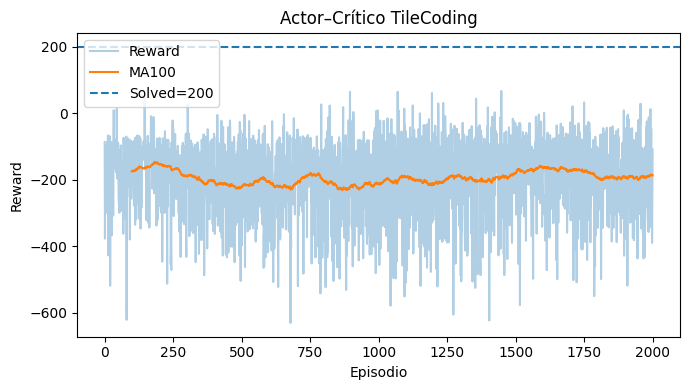

In [28]:
import numpy as np, matplotlib.pyplot as plt

R = np.array(ac_run["rewards"], dtype=float)
print("episodios:", len(R), "| R[0..3]:", R[:3], "| R[-3..]:", R[-3:])

win = 100
cs = np.cumsum(np.insert(R, 0, 0))
MA = (cs[win:] - cs[:-win]) / float(win) if len(R) >= win else np.array([])

umbral = 200
idx = np.where(MA >= umbral)[0]
ep_umbral = int(idx[0] + win) if len(idx)>0 else None
print("Episodio umbral (MA100 ≥ 200):", ep_umbral)

plt.figure(figsize=(7,4))
plt.plot(R, alpha=0.35, label="Reward")
if MA.size>0:
    xs = np.arange(win-1, win-1+len(MA))
    plt.plot(xs, MA, label=f"MA{win}")
plt.axhline(200, ls="--", label="Solved=200")
if ep_umbral: plt.axvline(ep_umbral, ls=":", label=f"Umbral@{ep_umbral}")
plt.xlabel("Episodio"); plt.ylabel("Reward"); plt.title("Actor–Crítico TileCoding")
plt.legend(); plt.tight_layout(); plt.show()


In [29]:
# Primero prueba con 1 episodio para que no bloquee
evaluate_agent(
    ac_run["agent"],
    env_id="LunarLander-v2",
    bounds=ac_run["bounds"],
    video_episodes=1,          # ← antes tenías 3; empieza en 1
    video_folder="videos_ac",
    name_prefix="ac_tile"
)


🎥 Grabando 1 episodios de LunarLander-v2…
MoviePy - Building video /home/jovyan/MVP_RL_LunarLander/videos_ac/ac_tile-episode-0.mp4.
MoviePy - Writing video /home/jovyan/MVP_RL_LunarLander/videos_ac/ac_tile-episode-0.mp4



MoviePy - Done !
MoviePy - video ready /home/jovyan/MVP_RL_LunarLander/videos_ac/ac_tile-episode-0.mp4
   ✅ Episodio 1 → reward -16.48

🏁 Mostrando vídeos de «videos_ac/»


In [1]:
# =======================
# Actor–Crítico (NN) A2C
# =======================
import os, time, json, math, csv
from dataclasses import dataclass, asdict
from typing import Tuple, Optional, Dict, Any, List

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import gymnasium as gym

# --- Compat gym v2/v3
def reset_env(env, seed=None):
    try:
        obs, _ = env.reset(seed=seed)
    except TypeError:
        out = env.reset()
        obs = out[0] if isinstance(out, tuple) else out
    return obs

def step_env(env, action):
    out = env.step(action)
    if len(out) == 5:
        obs, r, term, trunc, info = out
        done = term or trunc
    else:
        obs, r, done, info = out
    return obs, r, done, info

# --- Pequeño MLP
class MLP(nn.Module):
    def __init__(self, in_dim: int, out_dim: int, hidden=(256,256), out_activation=None):
        super().__init__()
        layers = []
        last = in_dim
        for h in hidden:
            layers += [nn.Linear(last, h), nn.ReLU()]
            last = h
        layers += [nn.Linear(last, out_dim)]
        if out_activation is not None:
            layers += [out_activation]
        self.net = nn.Sequential(*layers)
    def forward(self, x): return self.net(x)

# --- Agente NN
class ACNNAgent:
    """
    Actor–Crítico "vanilla" con política categórica.
    Interfaz compatible con tus evaluadores:
      - choose_action(state) -> int
      - update(state, action, reward, next_state, done)
      - save(path) / load(path, obs_dim, n_actions)
    """
    def __init__(
        self,
        obs_dim: int,
        n_actions: int,
        actor_hidden=(256,256),
        critic_hidden=(256,256),
        actor_lr=3e-4,
        critic_lr=3e-4,
        gamma=0.99,
        entropy_coef=0.01,
        value_coef=0.5,
        grad_clip=0.5,
        device: Optional[str]=None
    ):
        self.device = device or ("cuda" if torch.cuda.is_available() else "cpu")
        self.gamma = gamma
        self.entropy_coef = entropy_coef
        self.value_coef = value_coef
        self.grad_clip = grad_clip
        self.n_actions = n_actions

        self.actor  = MLP(obs_dim, n_actions, actor_hidden).to(self.device)
        self.critic = MLP(obs_dim, 1,        critic_hidden).to(self.device)

        self.opt_actor  = optim.Adam(self.actor.parameters(), lr=actor_lr)
        self.opt_critic = optim.Adam(self.critic.parameters(), lr=critic_lr)

    def _dist(self, logits):
        return torch.distributions.Categorical(logits=logits)

    @torch.no_grad()
    def choose_action(self, state: np.ndarray) -> int:
        self.actor.eval()
        x = torch.as_tensor(state, dtype=torch.float32, device=self.device).unsqueeze(0)
        logits = self.actor(x)
        dist = self._dist(logits)
        return int(dist.sample().item())

    def evaluate(self, obs_tensor):
        logits = self.actor(obs_tensor)
        dist   = self._dist(logits)
        value  = self.critic(obs_tensor).squeeze(-1)
        return dist, value

    def update(self, s, a, r, s2, done):
        self.actor.train(); self.critic.train()
        s      = torch.as_tensor(s,  dtype=torch.float32, device=self.device).unsqueeze(0)
        s2     = torch.as_tensor(s2, dtype=torch.float32, device=self.device).unsqueeze(0)
        a      = torch.as_tensor(a,  dtype=torch.long,    device=self.device)
        r      = torch.as_tensor(r,  dtype=torch.float32, device=self.device)
        done_t = torch.as_tensor(done, dtype=torch.float32, device=self.device)

        dist, v  = self.evaluate(s)    # [1], [1]
        _, v2    = self.evaluate(s2)   # [1], [1]

        target   = r + self.gamma * (1.0 - done_t) * v2.detach()
        advantage = target - v

        logp = dist.log_prob(a)
        entropy = dist.entropy().mean()

        actor_loss  = -(logp * advantage.detach()) - self.entropy_coef * entropy
        critic_loss = nn.functional.mse_loss(v, target.detach())
        loss = actor_loss + self.value_coef * critic_loss

        self.opt_actor.zero_grad(set_to_none=True)
        self.opt_critic.zero_grad(set_to_none=True)
        loss.backward()
        if self.grad_clip:
            nn.utils.clip_grad_norm_(self.actor.parameters(), self.grad_clip)
            nn.utils.clip_grad_norm_(self.critic.parameters(), self.grad_clip)
        self.opt_actor.step()
        self.opt_critic.step()

        return {
            "actor_loss": float(actor_loss.detach().cpu().item()),
            "critic_loss": float(critic_loss.detach().cpu().item()),
            "entropy": float(entropy.detach().cpu().item()),
            "advantage": float(advantage.detach().cpu().item()),
            "value": float(v.detach().cpu().item()),
            "target": float(target.detach().cpu().item()),
        }

    # --- Persistencia
    def save(self, path: str, extra: Optional[Dict[str,Any]]=None):
        os.makedirs(os.path.dirname(path), exist_ok=True)
        torch.save({
            "actor": self.actor.state_dict(),
            "critic": self.critic.state_dict(),
            "n_actions": self.n_actions,
        }, path)
        if extra:
            with open(path.replace(".pt",".json"), "w", encoding="utf-8") as f:
                json.dump(extra, f, indent=2)

    @staticmethod
    def load(path: str, obs_dim: int, n_actions: int, device: Optional[str]=None, actor_hidden=(256,256), critic_hidden=(256,256)):
        ckpt = torch.load(path, map_location=device or ("cuda" if torch.cuda.is_available() else "cpu"))
        agent = ACNNAgent(obs_dim, n_actions, actor_hidden, critic_hidden, device=device)
        agent.actor.load_state_dict(ckpt["actor"])
        agent.critic.load_state_dict(ckpt["critic"])
        return agent

# --- Config y training wrapper
@dataclass
class TrainACConfig:
    env_id: str = "LunarLander-v2"  # o v3
    seed: Optional[int] = 0
    total_episodes: int = 2000
    max_steps_per_ep: int = 1000
    gamma: float = 0.99
    actor_lr: float = 3e-4
    critic_lr: float = 3e-4
    entropy_coef: float = 0.01
    value_coef: float = 0.5
    grad_clip: float = 0.5
    actor_hidden: Tuple[int,int] = (256,256)
    critic_hidden: Tuple[int,int] = (256,256)
    model_dir: str = "models/ac_nn"
    eval_every: int = 0   # 0 = desactivado (usa tus evaluadores fuera del loop)

def train_ac_nn(cfg: TrainACConfig):
    # Semillas
    if cfg.seed is not None:
        np.random.seed(cfg.seed)
        torch.manual_seed(cfg.seed)
        torch.cuda.manual_seed_all(cfg.seed)

    env = gym.make(cfg.env_id)
    obs_dim = env.observation_space.shape[0]
    n_actions = env.action_space.n

    agent = ACNNAgent(
        obs_dim, n_actions,
        actor_hidden=cfg.actor_hidden,
        critic_hidden=cfg.critic_hidden,
        actor_lr=cfg.actor_lr,
        critic_lr=cfg.critic_lr,
        gamma=cfg.gamma,
        entropy_coef=cfg.entropy_coef,
        value_coef=cfg.value_coef,
        grad_clip=cfg.grad_clip
    )

    rewards, lengths, logs = [], [], []
    for ep in range(1, cfg.total_episodes+1):
        obs = reset_env(env, seed=(cfg.seed + ep if cfg.seed is not None else None))
        done, ep_r, steps = False, 0.0, 0

        while not done and steps < cfg.max_steps_per_ep:
            a = agent.choose_action(obs)
            nobs, r, done, _ = step_env(env, a)

            # (opcional) reward clipping ayuda estabilidad
            # r = float(np.clip(r, -10, 10))

            stats = agent.update(obs, a, r, nobs, float(done))

            obs = nobs
            ep_r += r
            steps += 1

        rewards.append(ep_r)
        lengths.append(steps)
        if ep % 10 == 0 or ep == 1:
            ma100 = np.mean(rewards[-100:])
            print(f"[{ep:04d}/{cfg.total_episodes}] R={ep_r:7.2f} | MA100={ma100:7.2f} | steps={steps}")

        logs.append({"episode": ep, "reward": ep_r, "length": steps,
                     **{k: stats[k] for k in ["actor_loss","critic_loss","entropy","advantage","value","target"]}})

    # Guardado
    os.makedirs(cfg.model_dir, exist_ok=True)
    ts = time.strftime("%Y%m%d-%H%M%S")
    model_path = os.path.join(cfg.model_dir, f"ACNN_{ts}.pt")
    agent.save(model_path, extra={"config": asdict(cfg), "final_MA100": float(np.mean(rewards[-100:]))})

    csv_path = os.path.join(cfg.model_dir, f"ACNN_{ts}_train_log.csv")
    with open(csv_path, "w", newline="", encoding="utf-8") as f:
        w = csv.DictWriter(f, fieldnames=list(logs[0].keys()))
        w.writeheader(); w.writerows(logs)

    env.close()
    return {"agent": agent, "model_path": model_path, "csv_path": csv_path,
            "rewards": rewards, "lengths": lengths}


ModuleNotFoundError: No module named 'gymnasium'

In [ ]:
cfg = TrainACConfig(env_id="LunarLander-v2", total_episodes=2000, seed=0)
acnn_run = train_ac_nn(cfg)


In [ ]:
metrics_acnn = evaluate_agent_metrics(
    acnn_run["agent"],
    env_id="LunarLander-v2",
    num_episodes=100,
    threshold=200,
    bounds=None,          # NN no usa bounds (tu función lo permite si es None)
    seed_start=1000
)
metrics_acnn


In [ ]:
evaluate_agent(
    acnn_run["agent"],
    env_id="LunarLander-v2",
    bounds=None,          # no aplica
    video_episodes=1,     # empieza con 1 para no bloquear
    video_folder="videos_acnn",
    name_prefix="acnn"
)


In [ ]:
import numpy as np, matplotlib.pyplot as plt

R = np.array(acnn_run["rewards"], dtype=float)
win = 100
cs = np.cumsum(np.insert(R, 0, 0))
MA = (cs[win:] - cs[:-win]) / float(win) if len(R)>=win else np.array([])

umbral = 200
idx = np.where(MA >= umbral)[0]
ep_umbral = int(idx[0] + win) if len(idx)>0 else None
print("Episodio umbral (MA100 ≥ 200):", ep_umbral)

plt.figure(figsize=(7,4))
plt.plot(R, alpha=0.35, label="Reward")
if MA.size>0:
    xs = np.arange(win-1, win-1+len(MA))
    plt.plot(xs, MA, label=f"MA{win}")
plt.axhline(200, ls="--", label="Solved=200")
if ep_umbral: plt.axvline(ep_umbral, ls=":", label=f"Umbral@{ep_umbral}")
plt.title("Actor–Crítico NN (MA100)"); plt.xlabel("Episodio"); plt.ylabel("Reward")
plt.legend(); plt.tight_layout(); plt.show()


In [ ]:
#Implementacion de WORLD MODELS

In [13]:
# 1) Modelo del mundo (simplificado)
class WorldModel(nn.Module):
    def __init__(self, s_dim=8, a_dim=4, hid=256):
        super().__init__()
        self.lstm = nn.LSTM(input_size=s_dim+a_dim, hidden_size=hid, batch_first=True)
        self.head_ds = nn.Linear(hid, s_dim)     # delta s
        self.head_r  = nn.Linear(hid, 1)         # reward
        self.head_d  = nn.Linear(hid, 1)         # done (logit)
    def forward(self, s, a_oh, h=None):
        x, h = self.lstm(torch.cat([s, a_oh], -1), h)  # [B,T,H], h=(h_n,c_n)
        hlast = x[:, -1]
        ds = self.head_ds(hlast)
        r  = self.head_r(hlast)
        d  = torch.sigmoid(self.head_d(hlast))
        return ds, r.squeeze(-1), d.squeeze(-1), h

# 2) Paso en el entorno soñado (H=1)
with torch.no_grad():
    a = policy(torch.cat([s, hlast], -1)).argmax(-1)    # discreta
    a_oh = F.one_hot(a, num_classes=4).float()
    ds, r, d, h = world_model(s.unsqueeze(1), a_oh.unsqueeze(1), h)
    s_next = clip(s + ds, low, high)


NameError: name 'policy' is not defined

In [2]:
#implementacion DQN

In [3]:
pip install gymnasium[box2d] torch numpy matplotlib


  Using cached gymnasium-1.2.0-py3-none-any.whl.metadata (9.9 kB)
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
  Using cached box2d_py-2.3.5-cp312-cp312-linux_x86_64.whl
  Using cached pygame-2.6.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached swig-4.3.1-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (3.5 kB)
Using cached swig-4.3.1-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.9 MB)
Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
Using cached pygame-2.6.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.0 MB)
Using cached gymnasium-1.2.0-py3-none-any.whl (944 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando:", device)


Usando: cuda


In [5]:
import gymnasium as gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt

# Configurar dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando:", device)

# Red neuronal del agente
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128), nn.ReLU(),
            nn.Linear(128, 128), nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.net(x)

# Buffer de experiencia
class ReplayBuffer:
    def __init__(self, capacity=100_000):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = map(torch.tensor, zip(*batch))
        return (
            states.float().to(device),
            actions.long().to(device),
            rewards.float().to(device),
            next_states.float().to(device),
            dones.float().to(device)
        )

    def __len__(self):
        return len(self.buffer)

# Inicializar entorno y redes
env = gym.make("LunarLander-v3")
input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n

q_network = DQN(input_dim, output_dim).to(device)
target_net = DQN(input_dim, output_dim).to(device)
target_net.load_state_dict(q_network.state_dict())

optimizer = optim.Adam(q_network.parameters(), lr=1e-3)
buffer = ReplayBuffer()
batch_size = 64
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
update_target = 1000
steps_done = 0
total_rewards = []

# Entrenamiento
num_episodes = 6000
for ep in range(num_episodes):
    state, _ = env.reset(seed=ep)
    state = torch.tensor(state, dtype=torch.float32).to(device)
    done = False
    total_reward = 0

    while not done:
        if random.random() < epsilon:
            action = env.action_space.sample()
        else:
            with torch.no_grad():
                action = q_network(state).argmax().item()

        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        buffer.push(state.cpu().numpy(), action, reward, next_state, done)

        next_state_tensor = torch.tensor(next_state, dtype=torch.float32).to(device)
        state = next_state_tensor
        total_reward += reward

        if len(buffer) >= batch_size:
            s, a, r, s_, d = buffer.sample(batch_size)
            q_vals = q_network(s).gather(1, a.unsqueeze(1)).squeeze()
            with torch.no_grad():
                max_next_q_vals = target_net(s_).max(1)[0]
            targets = r + gamma * max_next_q_vals * (1 - d)
            loss = nn.MSELoss()(q_vals, targets)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            steps_done += 1
            if steps_done % update_target == 0:
                target_net.load_state_dict(q_network.state_dict())

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    total_rewards.append(total_reward)

    if ep % 100 == 0:
        avg100 = np.mean(total_rewards[-100:])
        print(f"Ep {ep:4d} | reward avg100: {avg100:.2f} | ε: {epsilon:.3f}")

# Guardar red entrenada
torch.save(q_network.state_dict(), "dqn_lunarlander6k.pt")
print("✅ Modelo guardado como dqn_lunarlander6k.pt")


Usando: cuda
Ep    0 | reward avg100: -53.06 | ε: 0.995
Ep  100 | reward avg100: -133.53 | ε: 0.603
Ep  200 | reward avg100: -52.27 | ε: 0.365
Ep  300 | reward avg100: 18.63 | ε: 0.221
Ep  500 | reward avg100: 126.97 | ε: 0.081
Ep  600 | reward avg100: 20.41 | ε: 0.049
Ep  700 | reward avg100: 223.89 | ε: 0.030
Ep  800 | reward avg100: -57.53 | ε: 0.018
Ep  900 | reward avg100: -160.93 | ε: 0.011
Ep 1000 | reward avg100: 187.92 | ε: 0.010
Ep 1100 | reward avg100: 207.39 | ε: 0.010
Ep 1200 | reward avg100: 169.92 | ε: 0.010
Ep 1300 | reward avg100: 249.51 | ε: 0.010
Ep 1400 | reward avg100: 242.24 | ε: 0.010
Ep 1500 | reward avg100: 261.09 | ε: 0.010
Ep 1600 | reward avg100: 211.33 | ε: 0.010
Ep 1700 | reward avg100: 145.62 | ε: 0.010
Ep 1800 | reward avg100: 253.16 | ε: 0.010
Ep 1900 | reward avg100: 248.01 | ε: 0.010
Ep 2000 | reward avg100: 226.15 | ε: 0.010
Ep 2100 | reward avg100: 251.36 | ε: 0.010
Ep 2200 | reward avg100: 270.37 | ε: 0.010
Ep 2300 | reward avg100: 275.71 | ε: 0.01

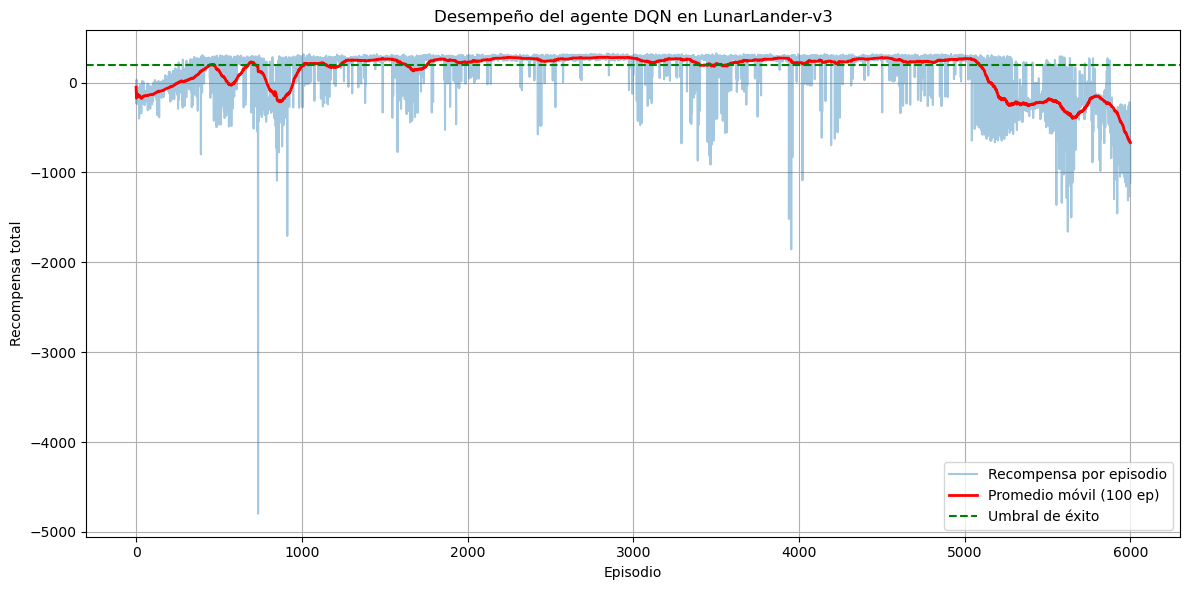

In [6]:
# === GRAFICAR RECOMPENSA POR EPISODIO Y PROMEDIO MÓVIL ===
window = 100
moving_avg = [np.mean(total_rewards[max(0, i - window):i+1]) for i in range(len(total_rewards))]

plt.figure(figsize=(12,6))
plt.plot(total_rewards, label='Recompensa por episodio', alpha=0.4)
plt.plot(moving_avg, label='Promedio móvil (100 ep)', color='red', linewidth=2)
plt.axhline(200, linestyle='--', color='green', label='Umbral de éxito')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.title('Desempeño del agente DQN en LunarLander-v3')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


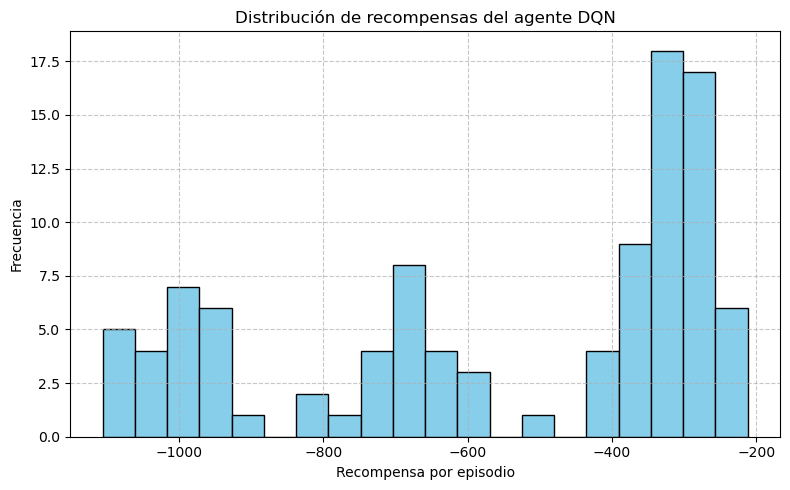

📊 Evaluación en 100 episodios:
 • Media      : -557.50
 • Mediana    : -396.79
 • Mínima     : -1105.70
 • Máxima     : -212.02
 • Éxito ≥200 : 0.0%


In [12]:
# === EVALUAR AGENTE ENTRENADO ===
def evaluate_agent(q_net, env_name="LunarLander-v3", episodes=100):
    q_net.eval()
    rewards = []
    for ep in range(episodes):
        env = gym.make(env_name)
        state, _ = env.reset(seed=ep)
        done = False
        total = 0
        while not done:
            with torch.no_grad():
                state_t = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)
                action = q_net(state_t).argmax().item()
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total += reward
            state = next_state
        rewards.append(total)
        env.close()
    return rewards

# Ejecutar evaluación
eval_rewards = evaluate_agent(q_network)

# === GRAFICAR DISTRIBUCIÓN DE RECOMPENSAS ===
plt.figure(figsize=(8,5))
plt.hist(eval_rewards, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de recompensas del agente DQN')
plt.xlabel('Recompensa por episodio')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar métricas
print(f"📊 Evaluación en 100 episodios:")
print(f" • Media      : {np.mean(eval_rewards):.2f}")
print(f" • Mediana    : {np.median(eval_rewards):.2f}")
print(f" • Mínima     : {np.min(eval_rewards):.2f}")
print(f" • Máxima     : {np.max(eval_rewards):.2f}")
print(f" • Éxito ≥200 : {np.mean(np.array(eval_rewards) >= 200) * 100:.1f}%")


In [ ]:
!pip install gymnasium[box2d] --quiet



In [ ]:
!pip install gymnasium
!pip install box2d-py pygame swig


In [ ]:


!pip install gymnasium[box2d] torch numpy matplotlib pygame box2d-py swig




In [ ]:
# Verifica que Gymnasium está activo
import gymnasium as gym
env = gym.make("LunarLander-v3")
obs, _ = env.reset()
print("Entorno cargado correctamente.")


In [ ]:
import gymnasium as gym


In [ ]:
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
import random
import os

# ✅ Clase TileCoder de tu PDF ya integrada
class TileCoder:
    def __init__(self, num_tilings, tiles_per_dim, state_bounds):
        self.num_tilings   = num_tilings
        self.tiles_per_dim = np.array(tiles_per_dim)
        self.state_bounds  = np.array(state_bounds)
        self.tile_widths   = (self.state_bounds[:,1] - self.state_bounds[:,0]) / (self.tiles_per_dim - 1)
        self.offsets       = (np.arange(num_tilings) * -1.0/num_tilings)[...,None] * self.tile_widths
        self.total_tiles   = num_tilings * np.prod(self.tiles_per_dim)

    def get_active_tiles(self, state):
        st = np.clip(state, self.state_bounds[:,0], self.state_bounds[:,1])
        scaled = (st - self.state_bounds[:,0]) / self.tile_widths
        active = []
        for i in range(self.num_tilings):
            base = i * np.prod(self.tiles_per_dim)
            coords = np.floor(scaled + self.offsets[i]).astype(int)
            idx = base + sum(coords[d] * np.prod(self.tiles_per_dim[:d])
                             for d in range(len(coords)))
            active.append(int(idx))
        return active

# ✅ Modelo de red neuronal que trabaja con codificación dispersa
class DQNTile(nn.Module):
    def __init__(self, input_size, output_size):
        super(DQNTile, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, output_size)
        )

    def forward(self, x):
        return self.fc(x)

# ✅ Configuración
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
env = gym.make("LunarLander-v3")

state_bounds = np.array([
    [-1.5, 1.5],     # pos x
    [-.5, 1.5],      # pos y
    [-3.0, 3.0],     # vel x
    [-3.0, 3.0],     # vel y
    [-np.pi, np.pi],# angle
    [-3.0, 3.0],     # angular velocity
    [0, 1],          # leg1 contact
    [0, 1]           # leg2 contact
])
tile_coder = TileCoder(num_tilings=8, tiles_per_dim=[8]*8, state_bounds=state_bounds)
n_actions = env.action_space.n
input_size = tile_coder.total_tiles

model = DQNTile(input_size, n_actions).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# ✅ Replay Buffer
memory = deque(maxlen=100000)
batch_size = 64
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995

def select_action(state):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    state_tensor = torch.FloatTensor(state).unsqueeze(0).to(device)
    with torch.no_grad():
        q_values = model(state_tensor)
    return q_values.argmax().item()

def process_state(state):
    active = tile_coder.get_active_tiles(state)
    vector = np.zeros(tile_coder.total_tiles)
    vector[active] = 1.0
    return vector

# ✅ Entrenamiento
n_episodes = 6000
rewards = []

for ep in range(n_episodes):
    state, _ = env.reset()
    total_reward = 0
    done = False
    state_encoded = process_state(state)

    while not done:
        action = select_action(state_encoded)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        next_encoded = process_state(next_state)
        memory.append((state_encoded, action, reward, next_encoded, done))
        state_encoded = next_encoded
        total_reward += reward

        if len(memory) > batch_size:
            minibatch = random.sample(memory, batch_size)
            s_batch, a_batch, r_batch, s_next_batch, d_batch = zip(*minibatch)

            s_batch = torch.FloatTensor(s_batch).to(device)
            a_batch = torch.LongTensor(a_batch).unsqueeze(1).to(device)
            r_batch = torch.FloatTensor(r_batch).unsqueeze(1).to(device)
            s_next_batch = torch.FloatTensor(s_next_batch).to(device)
            d_batch = torch.FloatTensor(d_batch).unsqueeze(1).to(device)

            q_vals = model(s_batch).gather(1, a_batch)
            next_q_vals = model(s_next_batch).max(1)[0].unsqueeze(1)
            target = r_batch + (1 - d_batch) * gamma * next_q_vals

            loss = criterion(q_vals, target)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards.append(total_reward)

    if (ep+1) % 100 == 0:
        print(f"📘 Episodio {ep+1}/{n_episodes} - Recompensa: {total_reward:.2f} - Epsilon: {epsilon:.3f}")

# ✅ Guardar resultados
np.save("rewards_tile.npy", rewards)
torch.save(model.state_dict(), "dqn_tile_lunarlander6k.pt")
print("✅ Entrenamiento finalizado y modelo guardado.")


In [21]:
pip freeze > requirementsT.txt

Note: you may need to restart the kernel to use updated packages.


Processing /home/conda/feedstock_root/build_artifacts/alembic_1737358504394/work (from -r requirementsT.txt (line 1))
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/home/conda/feedstock_root/build_artifacts/alembic_1737358504394/work'

Note: you may need to restart the kernel to use updated packages.


In [29]:
import nbformat
import re
import subprocess

# Notebook a leer
notebook_path = "TileCoding_QL_SARSA_Y_NN.ipynb"

# Leer el notebook
nb = nbformat.read(open(notebook_path, encoding="utf-8"), as_version=4)

# Buscar imports directos
import_pattern = re.compile(r'^\s*(?:from|import)\s+([a-zA-Z0-9_\.]+)')
libs = set()

for cell in nb.cells:
    if cell.cell_type == "code":
        for line in cell.source.splitlines():
            match = import_pattern.match(line)
            if match:
                lib = match.group(1).split('.')[0]
                libs.add(lib)

# Agregar manualmente dependencias indirectas importantes
extra_libs = {"pygame", "box2d-py", "Box2D", "swig"}
libs.update(extra_libs)

# Obtener lista completa de paquetes instalados
installed = subprocess.check_output(["pip", "freeze"]).decode().splitlines()

# Filtrar con versiones exactas
final_reqs = []
for lib in sorted(libs):
    for pkg in installed:
        if pkg.lower().startswith(lib.lower() + "=="):
            final_reqs.append(pkg)
            break

# Guardar en requirements.txt
with open("requirements.txt", "w") as f:
    f.write("\n".join(final_reqs))

print("✅ requirements.txt generado con versiones exactas e incluye dependencias indirectas")
print("\n".join(final_reqs))


✅ requirements.txt generado con versiones exactas e incluye dependencias indirectas
Box2D==2.3.10
ipython==8.12.3
box2d-py==2.3.5
gymnasium==0.29.1
matplotlib==3.8.4
numpy==1.26.4
pygame==2.6.1
swig==4.3.1
torch==2.5.1+cpu
